# Challenge Large Scale Machine Learning


# 0. Introduction


### Authors: 
Pavlo Mozharovskyi (pavlo.mozharovskyi@telecom-paris.fr), Stephan Clémençon, Jayant Sen Gupta


## Functional anomaly detection

**Anomaly detection** (or **outlier detection**) comprises the **machine learning** methods aimed at identification of observations that exhibit suspicious behaviour and are very likely to cause a problem. In the **unsupervised learning** framework, no label indicating whether a training observation is anomalous or not is available. Hence, anomalies should be identified in an automatic way by learning the *normal* behavior, that of the vast majority of the observations, and considering those differing significantly from it as *abnormal*. Logically, anomalies are rare in the data and thus fall in *low density* regions: anomaly detection thus boils down to identifying the *tail* of the distribution.

With the ubiquitous deployment of sensors monitoring nearly continuously the health of complex infrastructures, **anomaly detection** can now rely on measurements sampled at a very high frequency, providing a very rich representation of the phenomenon under surveillance. In order to exploit fully the collected information, the observations cannot be treated as multivariate data anymore and a functional analysis approach is required.

A (very) short list of **literature** regarding functional anomaly detection can include:
 - J.O. Ramsay, Silverman, B.W. (2005): Functional Data Analysis. Springer-Verlag, New-York.
 - Ferraty, F., Vieu, P. (2006): Nonparametric Functional Data Analysis: Theory and Practice. Springer Science & Business Media.
 - Chandola, V., Banerjee, A., Kumar, V. (2009): Anomaly detection: A survey. ACM Computing Surveys (CSUR) 41(3), 1-58.
 - Hubert, M., Rousseeuw, P.J., Segaert, P. (2015): Multivariate functional outlier detection. Statistical Methods & Applications 24(2), 177-202.
 - Wang, J.L., Chiou, J.M., Müller, H.G. (2016): Functional data analysis. Annual Review of Statistics and Its Application 3, 257-295.

## The properties of the dataset

The data set is provided by the Airbus and consistst of the measures of the accelerometer of helicopters during  1 minute at frequency 1024 Hertz, which yields time series measured at in total 60 * 1024 = 61440 equidistant time points.

### Training data: 

The training set consists of one file, **airbus_train.csv**.

File **airbus_train.csv** contains one observation per row, each observation having 61440 entries, measures with equivalent time distance of 1 / 1024 seconds.

There are in total 1677 training observations.

Training data, input (file **airbus_train.csv**): https://partage.imt.fr/index.php/s/zqrRggLBY8GRc9i

### Test data:

The training set consists of one file, **airbus_test.csv**, which has the same structure as file **airbus_train.csv**.

There are in total 2511 test observations.

Training data, output (file airbus_test.csv): https://partage.imt.fr/index.php/s/WpiqcjMq8ymg8zA

### Remark:

The task of the **unsupervised anomaly detection** is difficult, in the sense that, strictly speaking, your only feedback will be your score calculated by the submission website.

## The performance criterion

You should submit a file that contains in each row anomaly score for the observation in the corresponding row of the file **airbus_test.csv**. For a sample submission please see the codes below. Please note, that your score should provide ordering which allows to identify anomalies, i.e. the higher the value of the score, the **more abnormal** the observation should be considered.

The performance criterion is the **Area Under the Receiver Operating Characteristic** (AUC), see also:
https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve

## Notes


**Data Exploration**
* Le 690 et 691 sont presque pareils, ainsi que le 682 et 683 par exemple
* Afficher les features des 2 jeux de données (min, max, mean, var, etc.)
* Réussir à afficher des clusters avec la PCA (2D, 3D)
* Etudier les statistiques descriptives du fichier de soumissions. Comment sont réparties les variables vs le score obtenu.

**Data Augmentation**
* Les colonnes ont toutes la même signification !
* Concaténer xtrain et xtest, voir entraîner le modèle que sur xtest.
* Slicer les time series (séparer chaque time series en 3, appliquer un modèle, puis recoller les 3 morceaux et additionner (ou moyenner) le score_samples à la fin).

**Data preparation**
* Normaliser les time series
* Retirer de xtrain les outliers ? ou au contraire data augmentation ?
* Faire des clusters à partir de xtrain, puis les mêmes clusters sur xtest et appliquer un algo sur chaque cluster
* Essayer la SparsePCA et d'autres decompositions adaptées aux time series
* Rajouter une colonne cluster, qui indique dans quel cluster est la courbe. Les clusters sont déterminés par un algo (comme t-SNE), il pourrait y avoir 4-5 clusters, en fonction de la forme de la courbe. Il peut y avoir un % d'appartenance à chaque cluster.

**Modèles**
* Isolation forest

**DONE**
* Exporter les courbes temporelles des times series en images et utiliser un algo de détection d'anomalies dans des images.
* Data transformation: Générer des features explicatives (stats: mean, valeurs max, min, percentiles, etc., forme de courbe (à calculer) et entrainer un modèle que sur ces features
* Stationnariser par moyenne mobile
* Concatenate xtrain and xtrain_feat
* Fitter le modèle avec seulement les 100 premières lignes de xtrain
* Stacking
* Slice
* Virer les outliers de xtrain
* Afficher toutes les courbes de xtrain et xtest après les avoir passées à la moyenne mobile
* Tester autoencoder (VAE 2020.pdf)

**TO DO**
* A la fin, il faudra qu'on arrive à distinguer des types d'anomalies (plages de valeurs incohérentes, variations dans la forme, etc.) et à appliquer un préprocessing et un modèle différent à chacun, puis stacking 
* Cross validation (cf le github du prof)
* Trouver des librairies de visualisation (pour bien distinguer les time series et leurs caractéristiques, analyser les résultats des algos, etc.)
* Essayer avec différents RANDOM_STATE
* Tester le semi-supervisé, en considérant les données de train à 1 et les données de test pour lesquelles on est "sûrs" !


**Data transformation**
* Transformée de Fourier (FFT)
* Filtres (passe-bas, etc.)
* Formes d'ondelettes (ondelettes discrètes)
* Exponential smoothing
* Autres transformations (voir notes)
* Passage en log

**Modèles**
* Isolation Forest
* DBSCAN


* Regarder ces articles :
- https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1
- https://dl.acm.org/doi/abs/10.1145/2783258.2788611
- https://blogs.oracle.com/datascience/introduction-to-anomaly-detection



## Imports

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from scipy.stats import describe
from scipy.stats import rankdata
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
ROOT = "drive/My Drive/Colab Notebooks/Data Challenge 2/"
RANDOM_STATE = 261

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 1. Data loading

In [0]:
%%time

xtrain = np.loadtxt(ROOT + 'data/airbus_train.csv', delimiter= ' ')
print("Train:", xtrain.shape)
xtest = np.loadtxt(ROOT + 'data/airbus_test.csv', delimiter= ' ')
print("Test:", xtest.shape)

Train: (1677, 61440)
Test: (2511, 61440)
CPU times: user 2min 22s, sys: 16 s, total: 2min 38s
Wall time: 2min 43s


-----------
# 2. Data exploration

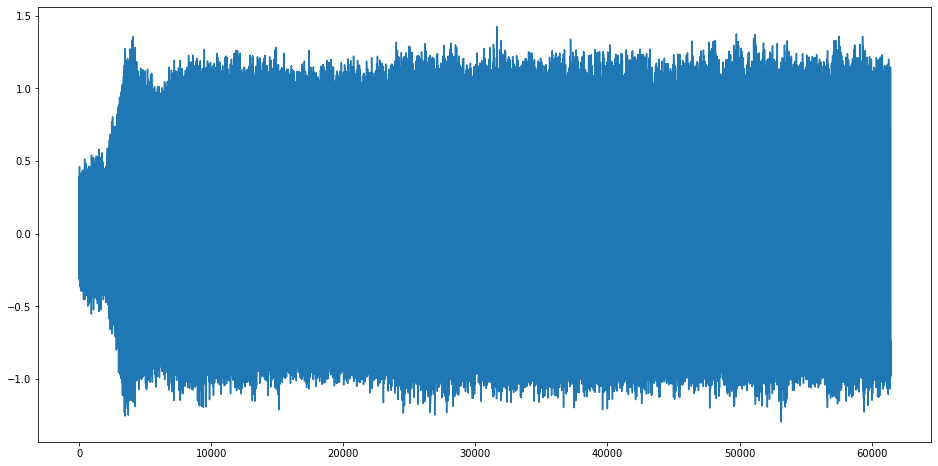

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtrain[1,:])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


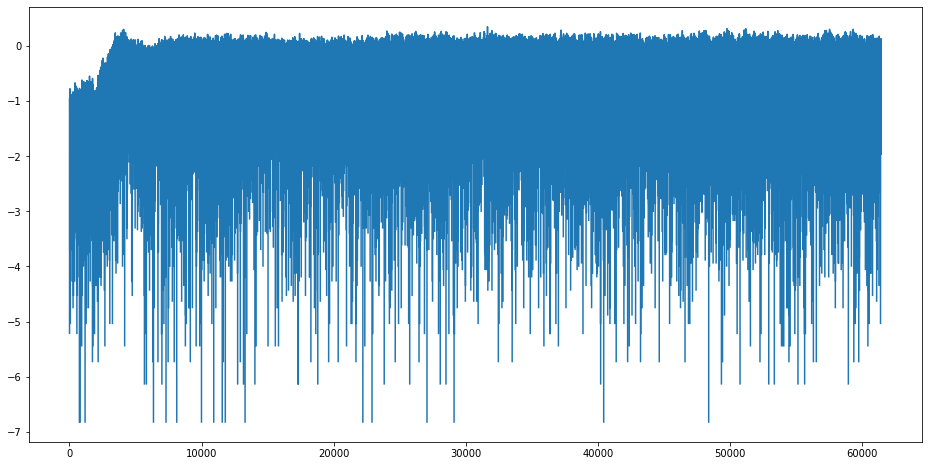

In [0]:
plt.figure(figsize=(16,8))
plt.plot(np.log(xtrain[1,:]))
plt.show()

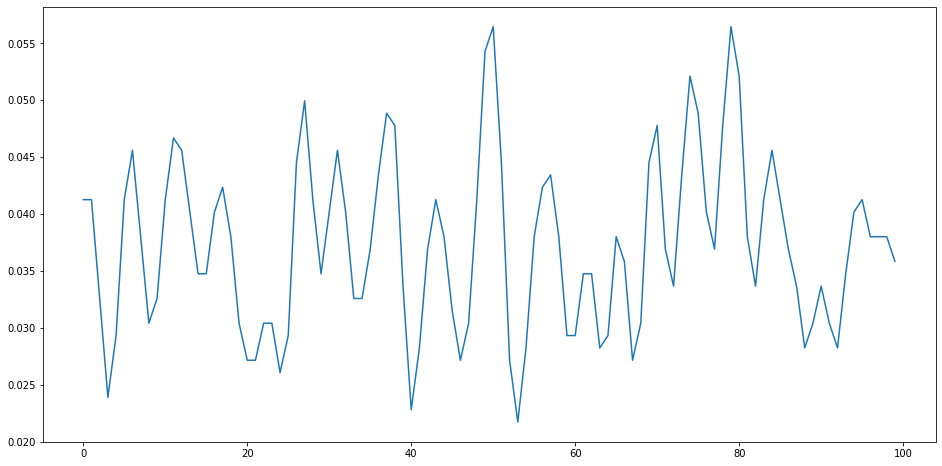

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtrain[0,:100])
plt.show()

In [0]:
xtrain.shape

(1677, 61440)

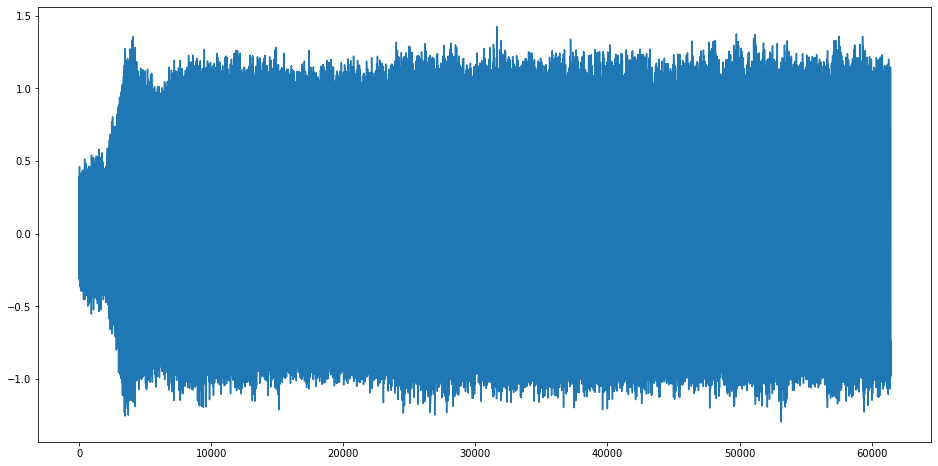

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtrain[1,:])
plt.show()

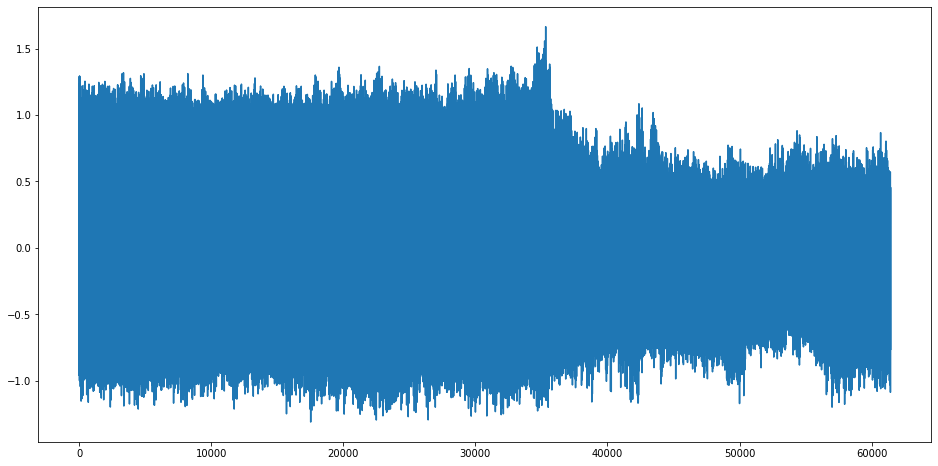

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtrain[10,:])
plt.show()

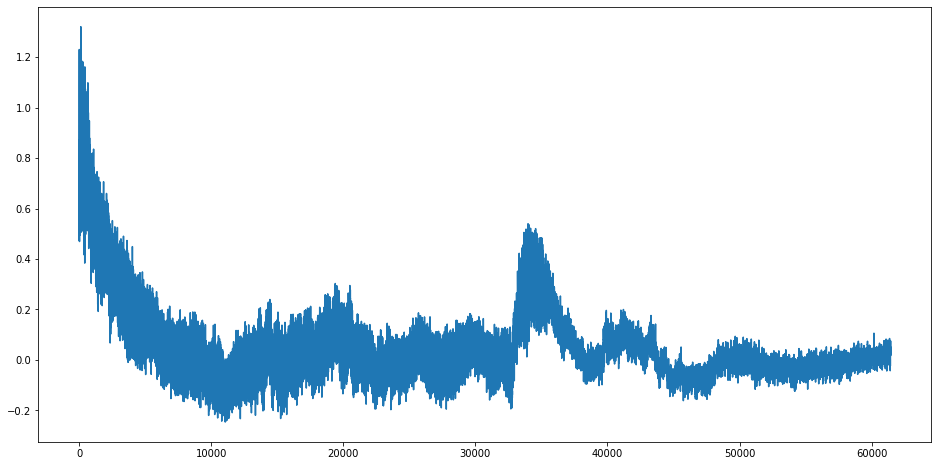

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtest[0,:])
plt.show()

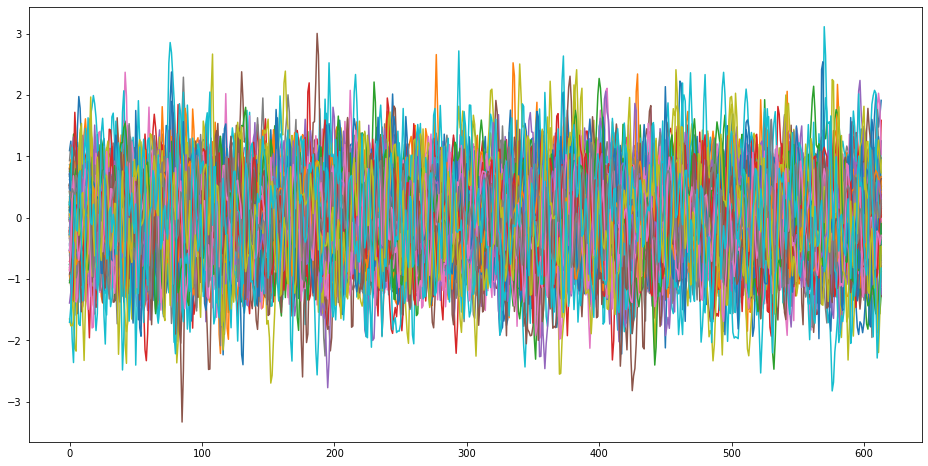

In [0]:
# Plot first 614 time points for first 100 observations
plt.figure(figsize=(16,8))
for i in range(100):
    plt.plot(range(614),xtrain[i,:614])
plt.show()

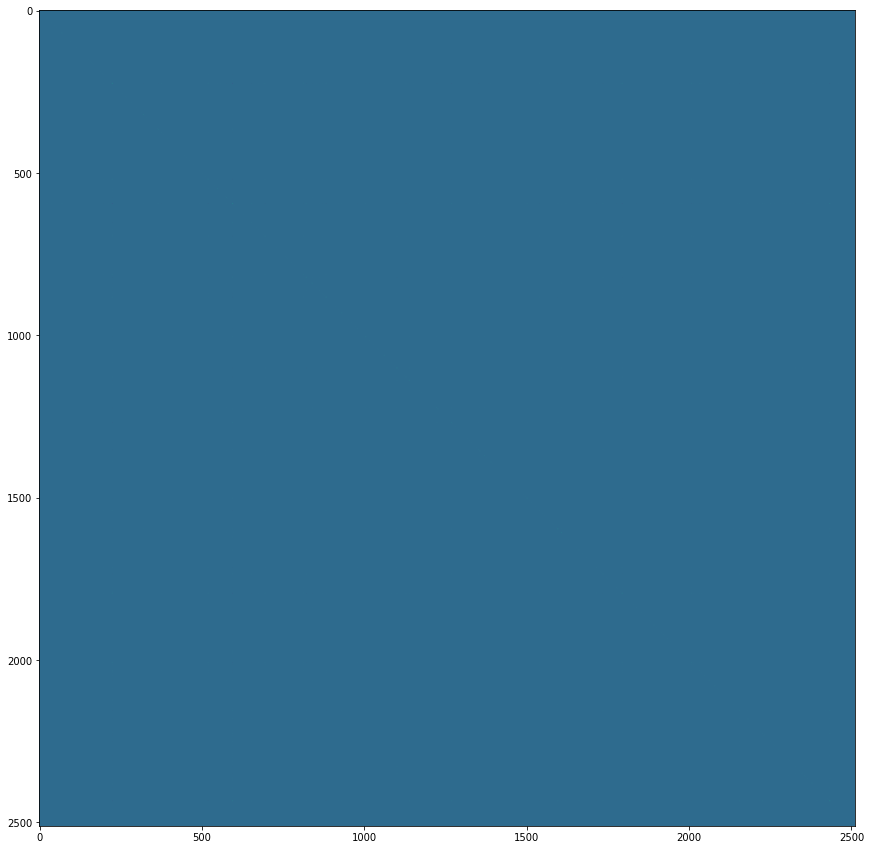

In [0]:
plt.figure(figsize=(15,15))
plt.imshow(X_train_cov)
plt.show()

--------------
# 3. Data preparation

## 3.1. xtrain without outliers

In [0]:
model_lof = LocalOutlierFactor(n_neighbors = 5, contamination = 'auto', novelty = False)
model_lof.fit(xtrain_feat)

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=10, novelty=False, p=2)

In [0]:
score_xtrain = -model_lof.negative_outlier_factor_ #.offset_ #.n_neighbors_
print(score_xtrain[:100])

[1.14894321 1.02740091 0.95265254 0.99584608 1.02553654 1.00833414
 1.08174896 1.00921812 1.12189957 0.99682778 1.11559796 0.99274604
 0.98394961 1.03594676 1.02715653 1.06643608 1.08723099 1.13852435
 0.9716844  1.02598204 1.04251157 1.01686322 1.12558343 1.04836736
 0.9849263  0.98964733 1.10477029 1.03059606 0.99587098 0.9870947
 1.01132112 1.05965479 1.08149106 1.03165506 1.11229675 1.03548021
 1.00130585 1.0406944  1.12530844 1.05094057 0.99535247 1.08260903
 1.17046229 1.06670353 1.00557188 1.06189469 1.00424268 1.01569926
 0.98416549 0.98592586 0.97097423 0.97289    1.00780648 1.01162495
 1.05393439 1.10908421 1.02383705 0.99370355 0.98512934 1.1087755
 1.01403267 1.01725706 1.01513419 0.99557804 1.01034418 1.02059903
 1.65806807 1.01362609 1.01836324 1.07515542 1.01098154 1.02987014
 0.96175308 1.07324275 0.99024914 1.01394612 1.17143067 1.06564869
 0.98541609 1.02832027 1.47703858 1.03446802 1.03423264 0.94365537
 1.03191113 1.00597102 1.01675998 0.99280772 0.98272529 0.959432

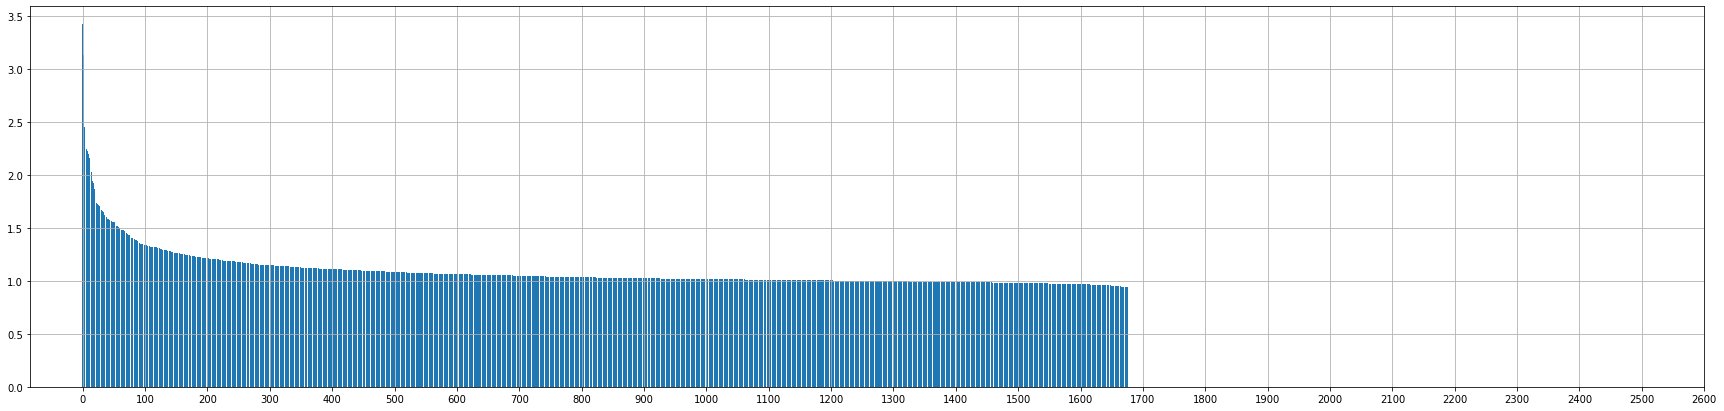

In [0]:
df_res2 = pd.DataFrame()
# minus signs are for sorting
df_res2["index"] = np.argsort(-score_xtrain)
df_res2["score"] = -np.sort(-score_xtrain)

plt.figure(figsize=(30,7))
plt.bar(range(df_res2.shape[0]), df_res2["score"])
plt.xticks(range(0,2700,100))
plt.grid()
plt.show()

In [0]:
list_indexes = df_res2[df_res2["index"] < 1677-1000]["index"].to_list()
len(list_indexes)

677

In [0]:
xtrain_without_outliers = np.take(xtrain, list_indexes, axis=0)
xtrain_without_outliers.shape

(677, 61440)

## 3.2. Slice time-series

In [0]:
xtrain.shape

(1677, 61440)

In [0]:
xtrain_sliced = np.concatenate((xtrain[:,:20480], xtrain[:,20480:20480*2], xtrain[:,20480*2:])) # 20480 = 61440/3
xtrain_sliced.shape   

(5031, 20480)

In [0]:
xtest_sliced = np.concatenate((xtest[:,:20480], xtest[:,20480:20480*2], xtest[:,20480*2:])) # 20480 = 61440/3
xtest_sliced.shape   

(7533, 20480)

In [0]:
# De-slice the score
sscore_sliced.shape

(7533,)

In [0]:
sscore = np.sum((sscore_sliced[:2511], sscore_sliced[2511:2511*2], sscore_sliced[2511*2:]), axis=0)  # 2511 = 7533/3
sscore.shape

(2511,)

## 3.3. T-SNE

In [0]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
print(X_embedded.shape)
X_embedded

(4, 2)


array([[325.9958  , 167.40208 ],
       [239.85898 , -57.06934 ],
       [101.5217  , 253.5319  ],
       [ 15.384936,  29.06047 ]], dtype=float32)

In [0]:
from sklearn.manifold import TSNE

X = np.array(xtest[:10])
X_embedded = TSNE(n_components=3).fit_transform(X)

print(X_embedded.shape)
X_embedded

(10, 3)


array([[ 523.1196  , -335.93964 ,  681.7289  ],
       [-467.30783 ,  373.5291  , -704.3747  ],
       [ -25.28888 , -585.36536 , -275.49524 ],
       [ 107.70808 ,  217.80943 ,  456.87152 ],
       [ 322.33328 ,  -32.659546,   10.477836],
       [ 499.60815 ,  614.5643  ,  227.87518 ],
       [   9.386404,  257.61688 , -249.78996 ],
       [-220.23637 ,   93.115074,  167.00981 ],
       [  14.750067, -235.07214 ,  -42.52049 ],
       [-601.86224 , -125.64766 , -164.93385 ]], dtype=float32)

In [0]:
X_embedded[:10]

array([[140.58572   ,  85.57845   ],
       [116.9906    ,  11.001481  ],
       [151.17596   , 133.2467    ],
       [205.22319   ,  42.67698   ],
       [192.66014   ,  93.97734   ],
       [ 96.16906   ,  56.894436  ],
       [154.51257   ,  45.175808  ],
       [ 97.62766   , 109.61025   ],
       [221.56595   , 103.87182   ],
       [171.66507   ,  -0.66423154]], dtype=float32)

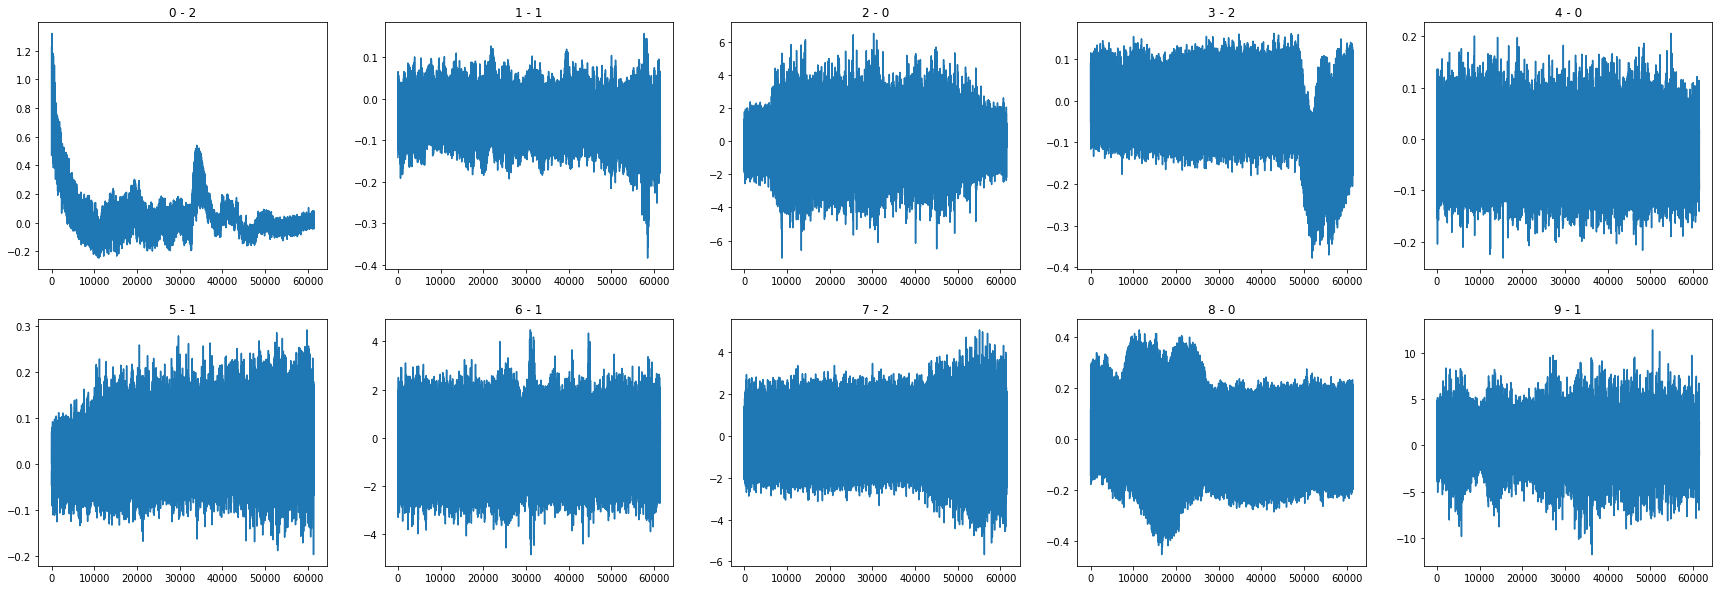

In [0]:
plt.figure(figsize=(30,10)) # x, y
for i in range(10):
  index = df_res["index"].iloc[i]
  plt.subplot(2,5,i+1)
  ax = plt.plot(xtest[i])
  plt.title(str(i) + " - " + str(X_embedded2[i]))
plt.show()

## 3.4. Rolling average

In [0]:
from scipy.signal import lfilter

n = 1000  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
mm = lfilter(b, a, xtrain[0,:])

In [0]:
xtrain_rolling = xtrain.copy()
for i in range(xtrain.shape[0]):
  xtrain_rolling[i] =  lfilter(b, a, xtrain[i,:])

In [0]:
xtest_rolling = xtest.copy()
for i in range(xtest.shape[0]):
  xtest_rolling[i] =  lfilter(b, a, xtest[i,:])

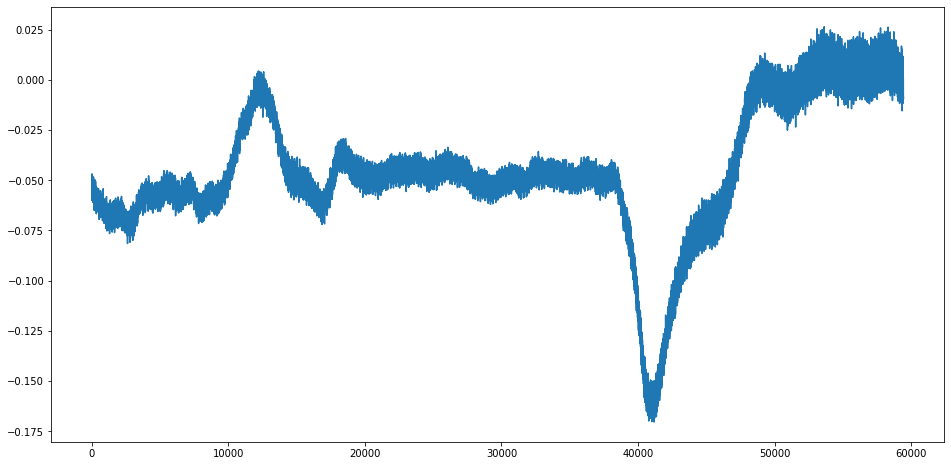

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtest_rolling[7,1000:-1000]) #xtest_rolling[7,1000:-1000]
plt.show()

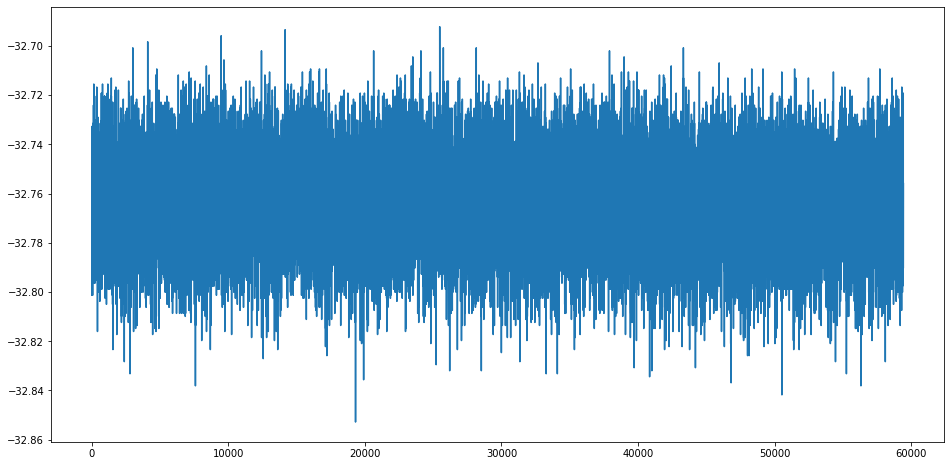

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtest[2125,1000:-1000])
plt.show()

## 3.X. Rebin

In [0]:
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)

xtrain_rebin = rebin(xtrain[:,:-40], (xtrain.shape[0], 614)) #xtrain[:,:-40]
print(xtrain_rebin.shape)

xtest_rebin = rebin(xtest[:,:-40], (xtest.shape[0], 614))
print(xtest_rebin.shape)

(1677, 614)
(2511, 614)


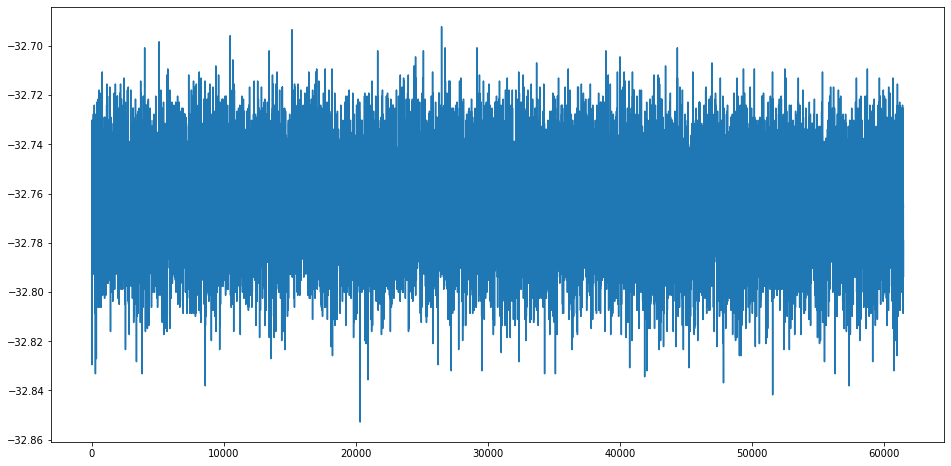

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtest[2125,:])
plt.show()

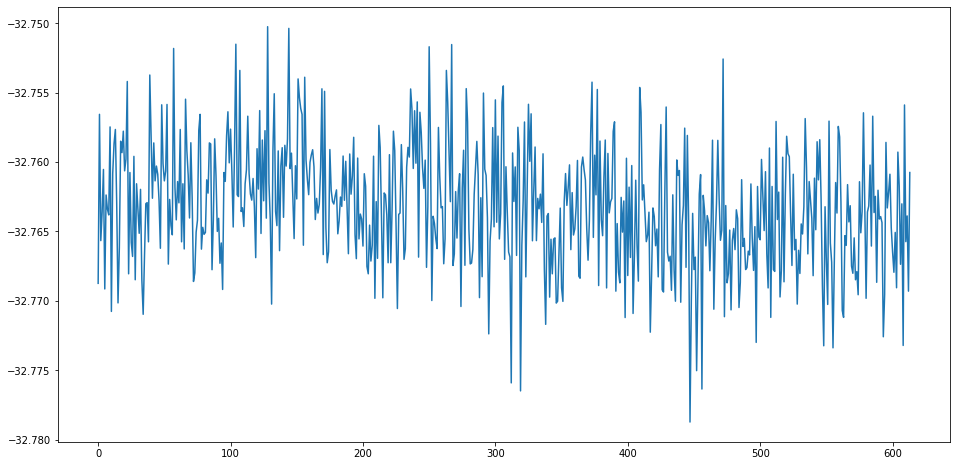

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtest_rebin[2125,:])
plt.show()

## 3.X. Fourier transform

In [0]:
xtrain_fft = np.fft.fft(xtrain_rebin,axis=1)
xtest_fft = np.fft.fft(xtest_rebin,axis=1)

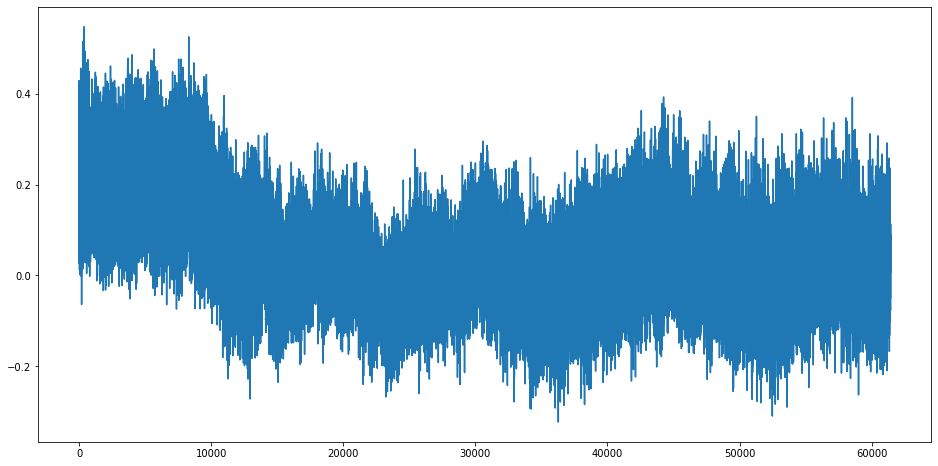

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtrain[1278,:])
plt.show()

In [0]:
xtrain_fft[1278,:]

array([2587.271052     +0.j        , 1856.65683155 -816.68852765j,
        422.67943152-1471.36526744j, ...,   81.28957649+1188.30304019j,
        422.67943152+1471.36526744j, 1856.65683155 +816.68852765j])

In [0]:
from scipy.signal import find_peaks

xtrain_peaks = np.zeros(xtrain_fft.shape)
for i in range(xtrain_fft.shape[0]):
  peaks, _ = find_peaks(xtrain_fft[i,:], height=0)
  xtrain_peaks[i][peaks] = xtrain_fft[i][peaks]

xtest_peaks = np.zeros(xtest_fft.shape)
for i in range(xtest_fft.shape[0]):
  peaks, _ = find_peaks(xtest_fft[i,:], height=0)
  xtest_peaks[i][peaks] = xtest_fft[i][peaks]

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


In [0]:
xtrain_peaks = xtrain_peaks[:,:312]
xtest_peaks = xtest_peaks[:,:312]

In [0]:
xtrain_peaks.shape

(1677, 614)

In [0]:
peaks.shape

(187,)

In [0]:
peaks

array([    4,     6,    10, ..., 61430, 61434, 61436])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


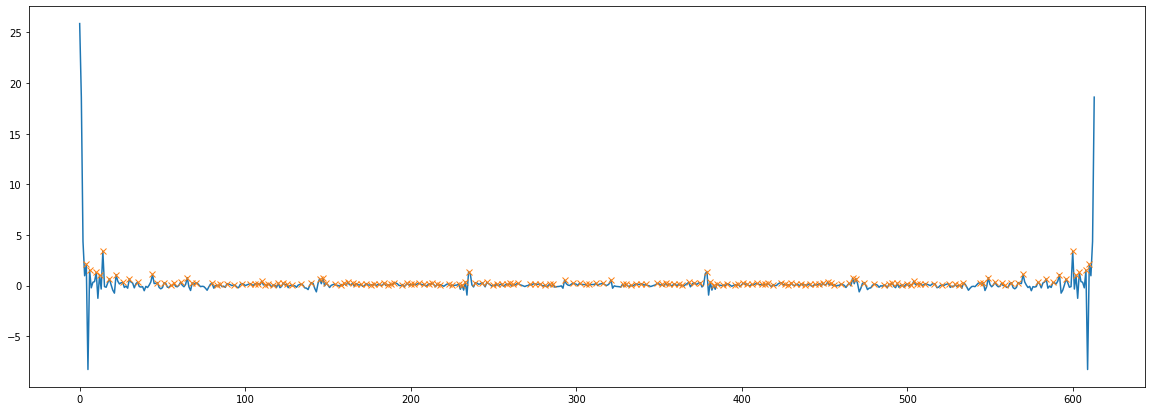

In [0]:
plt.figure(figsize=(20,7))
plt.plot(xtrain_fft[1278,:])
plt.plot(peaks, xtrain_fft[1278,:][peaks], "x")
plt.show()

## 3.X. Autocorrelation

In [0]:
np.correlate(xtrain[1278,:], xtrain[1278,:], mode='full')

array([0.00461165, 0.01035234, 0.01504805, ..., 0.01504805, 0.01035234,
       0.00461165])

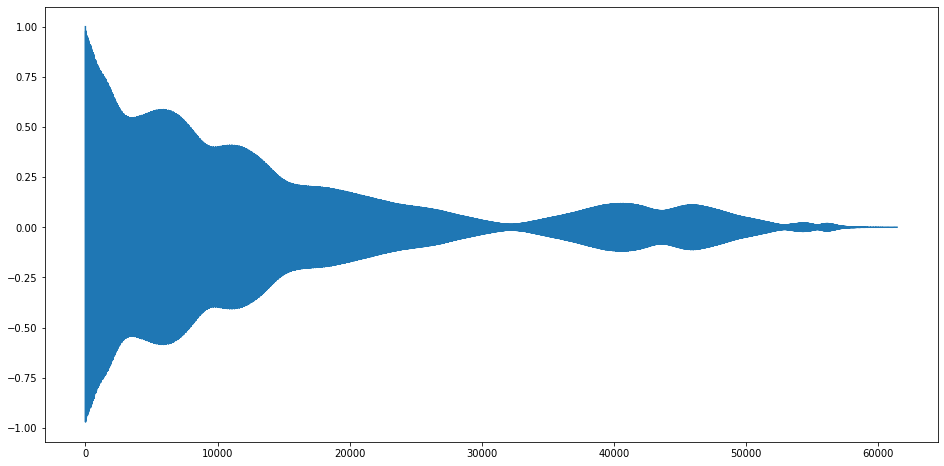

In [0]:
plt.figure(figsize=(16,8))
res = np.correlate(xtrain[1,:], xtrain[1,:], mode='full')
res = res[res.size//2:]
plt.plot(res / float(res.max()))
plt.show()

In [0]:
np.corrcoef(xtrain, rowvar=True)

array([[ 1.00000000e+00,  1.51575071e-03,  2.23878031e-04, ...,
         1.08669933e-02, -2.01295616e-03, -5.15065012e-03],
       [ 1.51575071e-03,  1.00000000e+00, -9.21144607e-01, ...,
         6.64788743e-03,  4.12189833e-04,  1.79920665e-03],
       [ 2.23878031e-04, -9.21144607e-01,  1.00000000e+00, ...,
        -2.11831978e-03, -1.44404164e-03, -6.28574652e-04],
       ...,
       [ 1.08669933e-02,  6.64788743e-03, -2.11831978e-03, ...,
         1.00000000e+00,  7.26439883e-02,  6.41388200e-03],
       [-2.01295616e-03,  4.12189833e-04, -1.44404164e-03, ...,
         7.26439883e-02,  1.00000000e+00, -1.24618830e-03],
       [-5.15065012e-03,  1.79920665e-03, -6.28574652e-04, ...,
         6.41388200e-03, -1.24618830e-03,  1.00000000e+00]])

In [0]:
xtrain.shape

(1677, 61440)

In [0]:
from scipy.stats import pearsonr

pearsonr(xtrain[632,:61440//2], xtrain[843,61440//2:])

(-0.001174379544651002, 0.8369263395347472)

In [0]:
pip install hurst

## 3.X. Hurst

In [0]:
!pip install hurst

In [0]:
from hurst import compute_Hc, random_walk

# Evaluate Hurst equation
H, c, data = compute_Hc(xtrain[632,:], kind='random_walk', simplified=True)
print(H,c,data)

0.10201493781126063 3.792147562190271 [[10, 17, 31, 56, 100, 177, 316, 562, 1000, 1778, 3162, 5623, 10000, 17782, 31622, 56234, 61440], [3.863082049897578, 4.734898417152129, 5.388821507812465, 5.9774126342814276, 6.50308579281939, 6.946586695623371, 7.379822372783377, 7.7877357120754604, 8.153865454645963, 8.593188142187401, 8.928020755840828, 9.141043914383976, 9.646658835179153, 9.866058677427654, 10.66089771593595, 10.78215899916871, 10.914339768495791]]


In [0]:
H, c, data = compute_Hc(xtest[1995,:], kind='random_walk', simplified=True)
print(H,c,data)

0.6100867752038351 0.6335939261122322 [[10, 17, 31, 56, 100, 177, 316, 562, 1000, 1778, 3162, 5623, 10000, 17782, 31622, 56234, 61440], [4.92610360344865, 5.92696865258766, 7.009531213868968, 8.178723300781456, 9.485211494950754, 11.168587025377866, 13.602955447117623, 17.25300058544352, 24.67671100579884, 37.14792614635464, 57.38803344175499, 95.59069268619946, 164.9312310962793, 281.41378821876043, 483.59690281541754, 869.3043770223187, 966.3583453027021]]


In [0]:
H, c, data = compute_Hc(xtrain[166,:], kind='random_walk', simplified=True)
print(H,c,data)

0.06806974202814202 5.153821126348029 [[10, 17, 31, 56, 100, 177, 316, 562, 1000, 1778, 3162, 5623, 10000, 17782, 31622, 56234, 61440], [5.269713766887783, 5.950083892692607, 6.5103563466234675, 6.959626941841319, 7.3717980664181955, 7.654472209655117, 7.978707341351413, 8.288137745004338, 8.601482174713938, 8.900490382418775, 9.130990026773356, 9.413903734863235, 9.73108059906159, 10.057106568449187, 10.224721033681881, 10.254658503658993, 10.168666357385632]]


In [0]:
"""H = []
for i in range(xtrain.shape[0]):
    try:
      H.append(compute_Hc(xtrain[i,:], kind='random_walk', simplified=True)[0])
    except:
      H.append(-1)
      print("Error at position: ", i)
df_H_train = pd.DataFrame(H)
df_H_train.to_csv(ROOT + "H_train.csv", sep=";")
print("train exported !")"""

H = []
for i in range(xtest[1930:].shape[0]):
    try:
      H.append(compute_Hc(xtest[i+1930,:], kind='random_walk', simplified=True)[0])
    except:
      H.append(-1)
      print("Error at position: ", i)
df_H_test = pd.DataFrame(H)
df_H_test.to_csv(ROOT + "H_test2.csv", sep=";")
print("test exported !")

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Error at position:  8
Error at position:  15
Error at position:  30
Error at position:  41
Error at position:  66
Error at position:  72
Error at position:  89
Error at position:  110
Error at position:  177
Error at position:  179
Error at position:  194
Error at position:  226
Error at position:  230
Error at position:  245
Error at position:  266
Error at position:  271
Error at position:  336
Error at position:  362
Error at position:  367
Error at position:  383
Error at position:  390
Error at position:  438
Error at position:  442
Error at position:  449
Error at position:  514
Error at position:  534
Error at position:  540
Error at position:  577
test exported !


In [0]:
print(i)

1938


In [0]:
df_H_test = pd.DataFrame(H)
df_H_test.to_csv(ROOT + "H_test.csv", sep=";")
print("test exported !")

test exported !


In [0]:
H

[0.2609464217147639,
 0.1171528449706215,
 0.1344978934978813,
 0.10870406399514158,
 0.1323247744002976,
 0.12885020021051674,
 0.11325984560835042,
 0.1099935916018746,
 0.08104964662154085]

In [0]:
plt.hist(H, bins=auto)

In [0]:
from statsmodels.tsa.stattools import acovf

acovf(xtrain[632,:]).shape

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


(61440,)

## 3.X. Wavelet transform

In [0]:
import pywt

list_coeff = pywt.wavedec(signal, waveletname)
"""
for signal in ecg_data:
  list_coeff = pywt.wavedec(signal, waveletname)
  features = []
  for coeff in list_coeff:
    features += get_features(coeff)
  list_features.append(features)
"""

'\nfor signal in ecg_data:\n  list_coeff = pywt.wavedec(signal, waveletname)\n  features = []\n  for coeff in list_coeff:\n    features += get_features(coeff)\n  list_features.append(features)'

In [0]:
pywt.wavedec(xtrain[632,:], "db4")

(array([-0.20515357,  0.1329641 ,  0.26794047, ..., -0.04622988,
        -0.08275524, -0.11693312]),
 array([-0.01326849, -0.01036911,  0.00153859, ...,  0.00022285,
         0.00476373, -0.01417794]))

## 3.5. Concatenate train and test

In [0]:
print(xtrain.shape)
print(xtest.shape)
xconcat = np.concatenate((xtrain, xtest), axis = 0)
xconcat.shape

(1677, 61440)
(2511, 61440)


(4188, 61440)

## 3.X. Convert time series to log

In [0]:
xtrain_log = np.log(xtrain)

In [0]:
np.log(xtrain).shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


(1677, 61440)

In [0]:
np.log(-5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan

## 3.6. Scaler

In [0]:
xtrain_scaled[0].shape

(61440,)

In [0]:
from sklearn.preprocessing import Normalizer, StandardScaler, RobustScaler, MaxAbsScaler, MinMaxScaler, maxabs_scale, QuantileTransformer

transformer = StandardScaler()  # fit does nothing.
#xtrain_scaled = transformer.fit_transform(xtrain)
#xtest_scaled = transformer.fit_transform(xtest)

for i in range(xtrain.shape[0]):
  xtrain_scaled[i] = transformer.fit_transform(xtrain[i].reshape(1, -1))
  
for i in range(xtest.shape[0]):
  xtest_scaled[i] = transformer.fit_transform(xtest[i].reshape(1, -1))

In [0]:
xtrain_scaled = maxabs_scale(xtrain) + 1 # Transforms certain curves in a weird way (ex: xtest[2125])
xtest_scaled = maxabs_scale(xtest) + 1

In [0]:
xtrain_scaled = np.empty([xtrain.shape[0], xtrain.shape[1]])
for i in range(xtrain.shape[0]):
  if (np.max(xtrain[i]) - np.mean(xtrain[i])) == 0:
    xtrain_scaled[i] = 0
  else:
    xtrain_scaled[i] = (xtrain[i] - np.mean(xtrain[i])) / (np.max(xtrain[i]) - np.mean(xtrain[i]))

xtest_scaled = np.empty([xtest.shape[0], xtest.shape[1]])
for i in range(xtest.shape[0]):
  if (np.max(xtest[i]) - np.mean(xtest[i])) == 0:
    xtest_scaled[i] = 0
  else:
    xtest_scaled[i] = (xtest[i] - np.mean(xtest[i])) / (np.max(xtest[i]) - np.mean(xtest[i]))

In [0]:
np.isnan(xtest_scaled).sum()

0

In [0]:
print(np.min(xtest_scaled[2,:]))
print(np.max(xtest_scaled[2,:]))
print(np.mean(xtest_scaled[2,:]))

0.7925065692908788
1.1989395058080348
0.9992473889490348


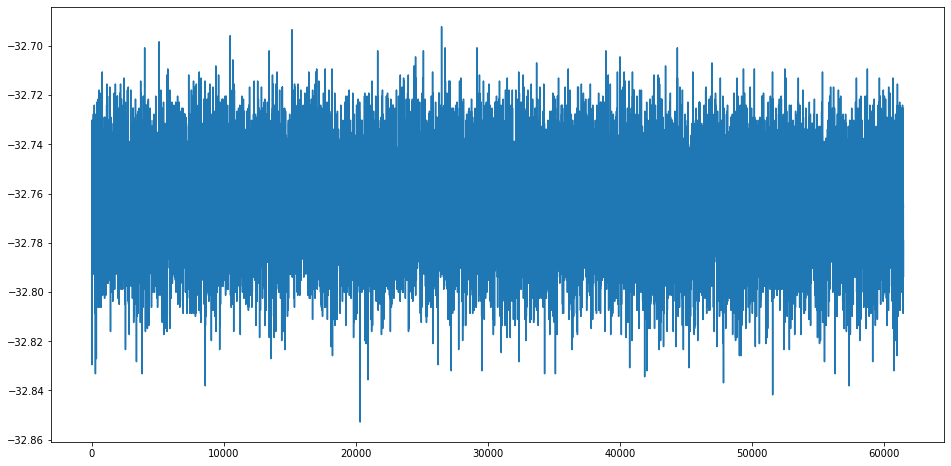

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtest[2125,:]) #2272
plt.show()

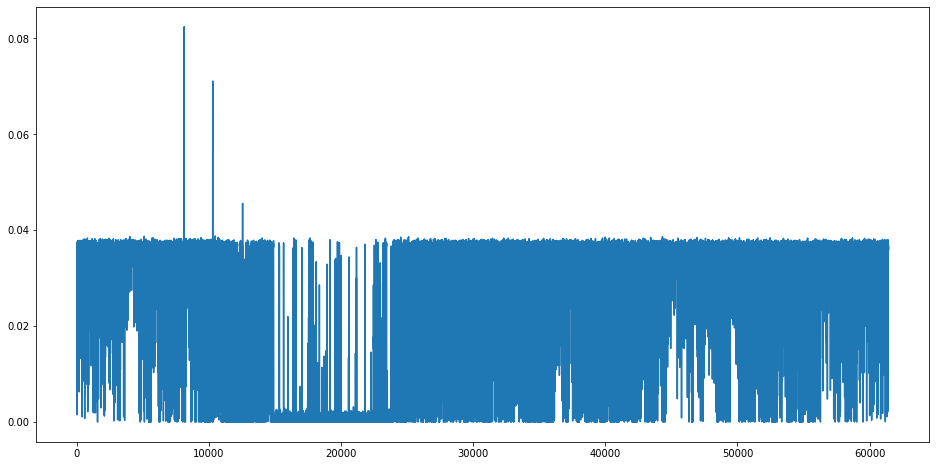

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtest_scaled[2125,:]) #2272
plt.show()

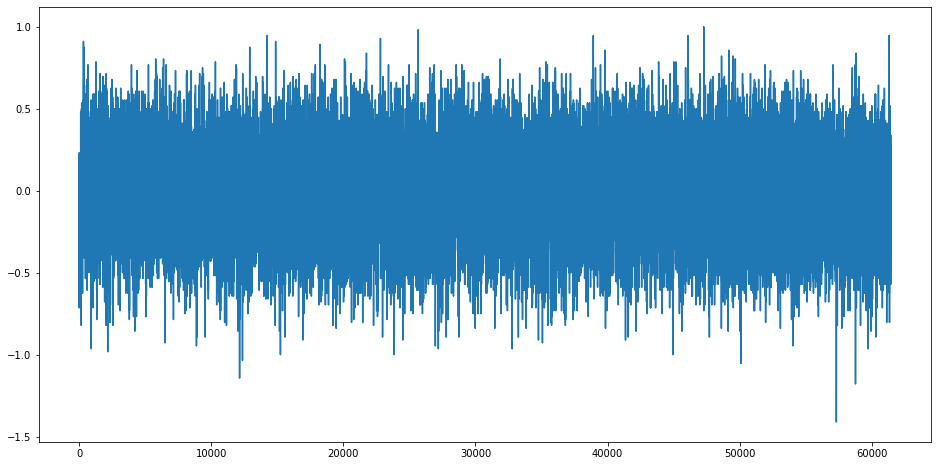

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtest_scaled[2272,:])
plt.show()

## 3.7. PCA

First option: Using the projection on a low-dimensional space

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

### Finding the optimal number of eigenvalues

Shape of covariance matrix: (1677, 1677)


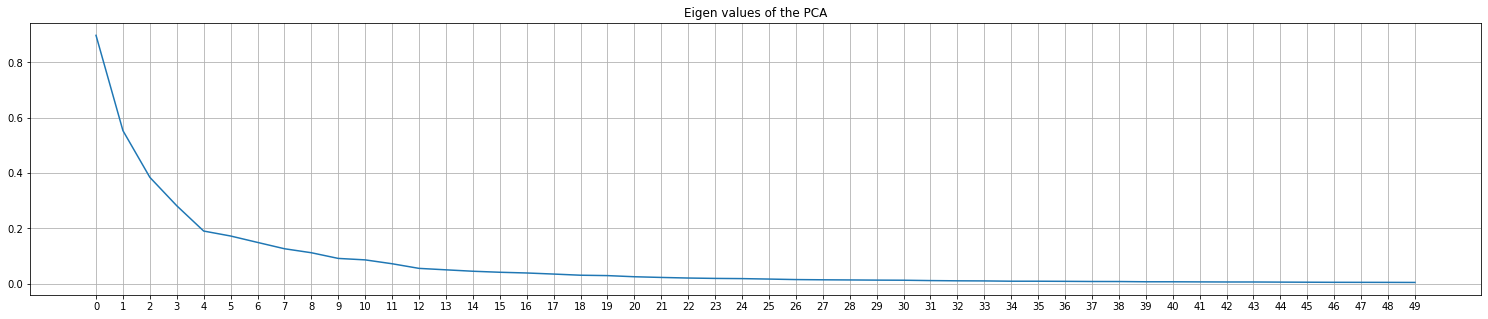

CPU times: user 16.3 s, sys: 3.27 s, total: 19.6 s
Wall time: 5.39 s


In [0]:
%%time
cov_matrix = np.cov(xtrain_rolling[:,300:-300]) #_rolling[:,1000:-1000]
print("Shape of covariance matrix:", cov_matrix.shape)

v, d, vt = np.linalg.svd(cov_matrix)
plt.figure(figsize=(26,5))
plt.plot(d[:50])
plt.title("Eigen values of the PCA")
plt.xticks(range(50))
plt.grid()
plt.show()

### PCA transformation

In [0]:
%%time
# PCA model
pca1 = PCA(n_components = 4, whiten = True, random_state=RANDOM_STATE)
pca1.fit(xtrain_rolling[:,300:-300]) #[:100,:]) #_rolling[:,1000:-1000]

# PCA fit_transform
xtrain_pca = pca1.transform(xtrain_rolling[:,300:-300]) #[:100,:]) #_rolling[:,1000:-1000]
xtest_pca = pca1.transform(xtest_rolling[:,300:-300]) #_rolling[:,1000:-1000]
print(xtrain_pca.shape)

(1677, 4)
CPU times: user 11.5 s, sys: 1.14 s, total: 12.6 s
Wall time: 4.23 s


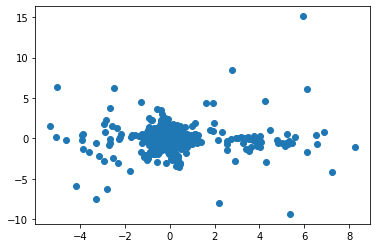

In [0]:
plt.scatter(xtrain_pca[:,0], xtrain_pca[:,1])
plt.show()

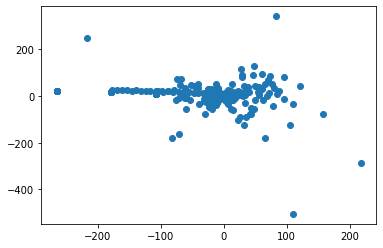

In [0]:
plt.scatter(xtest_pca[:,0], xtest_pca[:,1])
plt.show()

TODO: mettre les axes à la même échelle !

In [0]:
pca1_save = pca1
pca1_save.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 10,
 'random_state': 261,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': True}

## 3.8. KernelPCA

In [0]:
%%time

from sklearn.decomposition import KernelPCA

# KernelPCA model
kernel_pca = KernelPCA(kernel='rbf', random_state=RANDOM_STATE) #(, kernel='linear', gamma=None, degree=3, coef0=1, kernel_params=None, alpha=1.0, fit_inverse_transform=False, eigen_solver='auto', tol=0, max_iter=None, remove_zero_eig=False, copy_X=True, n_jobs=None)
kernel_pca.fit(xtrain) #[:100,:]) #_rolling[:,1000:-1000]

# KernelPCA fit_transform
xtrain_pca = kernel_pca.transform(xtrain) #[:100,:]) #_rolling[:,1000:-1000]
xtest_pca = kernel_pca.transform(xtest) #_rolling[:,1000:-1000]
print(xtrain_pca.shape)



(1677, 1676)
CPU times: user 1min 7s, sys: 4.77 s, total: 1min 12s
Wall time: 19.5 s


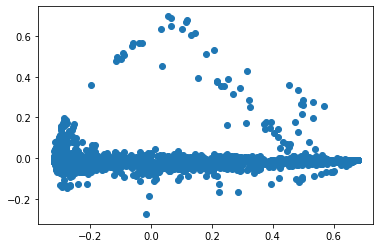

In [0]:
plt.scatter(xtrain_pca[:,0], xtrain_pca[:,1])
plt.show()

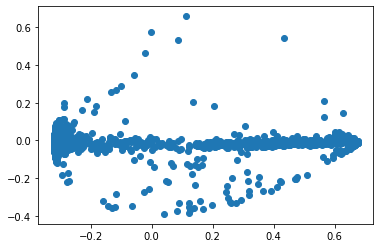

In [0]:
plt.scatter(xtest_pca[:,0], xtest_pca[:,1])
plt.show()

## 3.9. Feature set

- Calculer nombre d'extremas, la plus grosse variation locale (sur une courte zone), et essayer avec des pourcentages plutôt que des valeurs "arbitraires"

In [0]:
Hurst_train = np.loadtxt(ROOT + 'H_train.csv', delimiter=";")
Hurst_train

array([0.17454172, 0.03526651, 0.04309955, ..., 0.13773977, 0.09034906,
       0.12832643])

In [0]:
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import Normalizer, StandardScaler, RobustScaler, MaxAbsScaler, MinMaxScaler, maxabs_scale, QuantileTransformer

def compute_features(xset, isTrain):
  xset_feat = pd.DataFrame(columns=[])
  xset_feat["min"] = np.min(xset, axis=1)
  xset_feat["max"] = np.max(xset, axis=1)
  xset_feat["mean"] = np.mean(xset, axis=1)  
  #xset_feat["median"] = np.median(xset, axis=1)
  #xset_feat["var"] = np.var(xset, axis=1)
  #xset_feat["std"] = np.std(xset, axis=1)
  xset_feat["rms"] = np.mean(np.sqrt(xset**2), axis=1) #Root Mean Square value; square of the average of the squared amplitude values

  mean_crossings = []
  for i in range(0, xset.shape[0]):
    mean_crossing_indices = np.nonzero(np.diff(np.array(xset[i,:]) > np.nanmean(xset[i,:])))[0]
    mean_crossings.append(len(mean_crossing_indices))
  xset_feat["mean_crossings"] = StandardScaler().fit_transform(np.reshape(mean_crossings, (-1, 1)))

  if isTrain:
    xset_feat["hurst"] = np.loadtxt(ROOT + 'H_train.csv')
  else:
    xset_feat["hurst"] = np.loadtxt(ROOT + 'H_test.csv')
  
  #xset_feat["etendue"] = xset_feat["max"] - xset_feat["min"]
  #xset_feat["skewness"] = skew(xset, axis=1)
  #xset_feat["kurtosis"] = kurtosis(xset, axis=1)
  #xset_feat["start"] = np.mean(xset[:,:100],axis=1)
  #xset_feat["end"] = np.mean(xset[:,-100:],axis=1)
  #start = np.mean(xset[:,:100],axis=1)
  #end = np.mean(xset[:,-100:],axis=1)
  #xset_feat["progression"] = end - start
  
  #percentiles = np.percentile(xset, range(25,100,25), axis=1)
  #xset_feat["q1"] = percentiles[0]
  #xset_feat["q2"] = percentiles[1]
  #xset_feat["q3"] = percentiles[2]
  percentiles = np.percentile(xset, [10,30,70,90], axis=1)  
  #xset_feat["p10"] = percentiles[0]
  xset_feat["p30"] = percentiles[1]
  xset_feat["p70"] = percentiles[2]
  #xset_feat["p90"] = percentiles[3]

  return xset_feat

In [0]:
xtrain_feat = compute_features(xtrain, True) #_rolling[:,300:-300])
xtrain_feat.head()

min       max      mean  ...     hurst       p30       p70
0 -0.247552  0.299668  0.039373  ...  0.174542  0.034744  0.044516
1 -1.295304  1.423423  0.003725  ...  0.035267 -0.584136  0.542877
2 -1.745115  1.748343  0.012775  ...  0.043100 -0.642314  0.647694
3 -0.748198  0.717880  0.004919  ...  0.134347 -0.069298  0.079043
4 -1.213873  1.402794  0.032258  ...  0.036521 -0.517905  0.535277

[5 rows x 8 columns]

In [0]:
xtest_feat = compute_features(xtest, False) #_rolling[:,300:-300])
xtest_feat.head()

min       max      mean  ...     hurst       p30       p70
0 -0.246444  1.320870  0.052278  ...  0.260946 -0.026595  0.067152
1 -0.384193  0.157110 -0.044933  ...  0.117153 -0.074594 -0.013863
2 -7.058065  6.521087 -0.025039  ...  0.134498 -0.739461  0.687530
3 -0.377841  0.161022 -0.019569  ...  0.108704 -0.065903  0.041738
4 -0.231434  0.205329 -0.014652  ...  0.132325 -0.044312  0.014698

[5 rows x 8 columns]

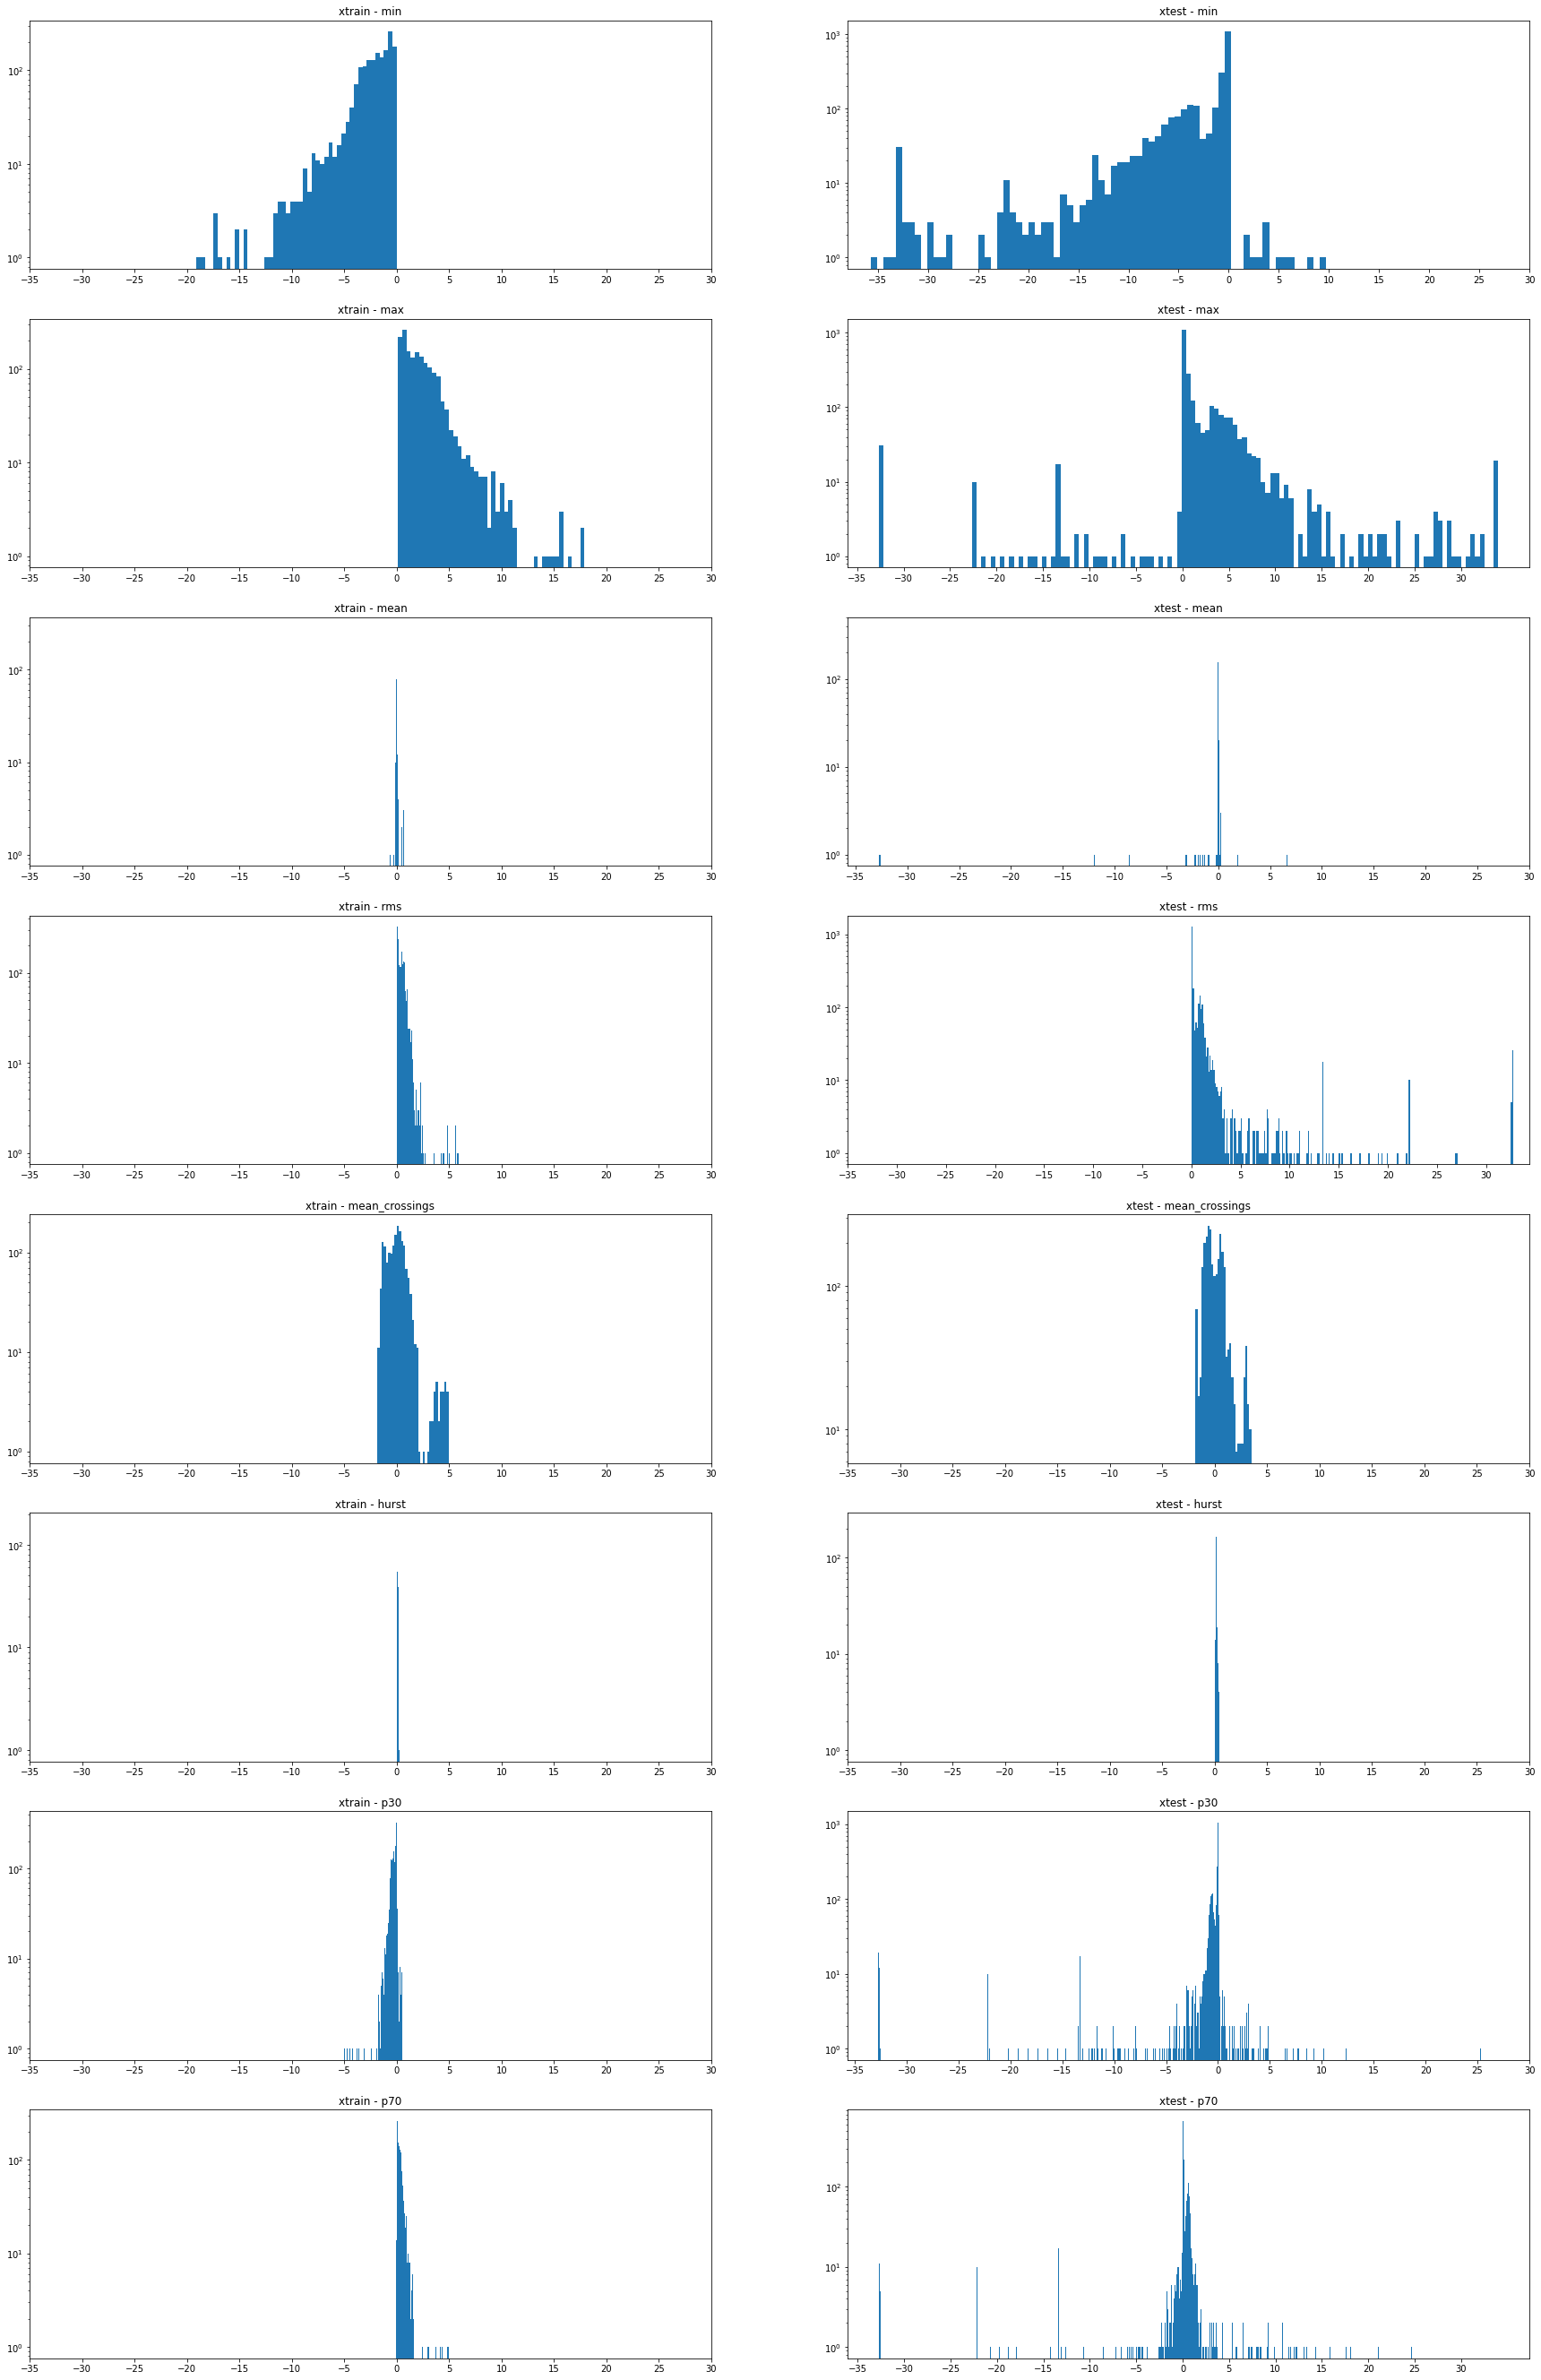

In [0]:
stats = xtrain_feat.columns

plt.figure(figsize=(30,6*len(stats)))
for index, stat in enumerate(stats):
  #xtrain
  plt.subplot(len(stats), 2, 2*index+1)
  plt.hist(xtrain_feat[stat], bins="auto", log=True)
  plt.title("xtrain - " + stat)
  plt.xticks(range(-35,35,5))
  #xtest
  plt.subplot(len(stats), 2, 2*index+2)
  plt.hist(xtest_feat[stat], bins="auto", log=True)
  plt.title("xtest - " + stat)
  plt.xticks(range(-35,35,5))
plt.show()

## 3.10. Concatenate PCA and feature columns

In [0]:
xtrain_pca.shape

(1677, 4)

In [0]:
xtrain_feat.shape

(1677, 8)

In [0]:
xtrain_pca_feat = np.concatenate((xtrain_pca, xtrain_feat), axis=1)
print(xtrain_pca_feat.shape)

(1677, 12)


In [0]:
xtest_pca_feat = np.concatenate((xtest_pca, xtest_feat), axis=1)
print(xtest_pca_feat.shape)

(2511, 12)


## 3.11. Compute pixel area

In [0]:
xtrain_surfaces = pd.read_csv(ROOT + "data/xtrain_surfaces.csv")
xtrain_surfaces.head()

res
0  0.086568
1  0.413251
2  0.390012
3  0.242677
4  0.407613

In [0]:
xtest_surfaces = pd.read_csv(ROOT + "data/xtest_surfaces.csv")
xtest_surfaces.head()

res
0  0.087646
1  0.205385
2  0.261933
3  0.258567
4  0.307871

In [0]:
xtrain_feat["surface"] = xtrain_surfaces["res"]
xtrain_feat.head()

min       max      mean       var    median   surface
0 -0.247552  0.299668  0.039373  0.000621  0.040173  0.086568
1 -1.295304  1.423423  0.003725  0.483777 -0.002714  0.413251
2 -1.745115  1.748343  0.012775  0.726425  0.029049  0.390012
3 -0.748198  0.717880  0.004919  0.021038  0.004331  0.242677
4 -1.213873  1.402794  0.032258  0.430353  0.008686  0.407613

In [0]:
xtest_feat["surface"] = xtest_surfaces["res"]
xtest_feat.head()

min       max      mean       var    median   surface
0 -0.246444  1.320870  0.052278  0.024690  0.012854  0.087646
1 -0.384193  0.157110 -0.044933  0.002959 -0.043788  0.205385
2 -7.058065  6.521087 -0.025039  2.071439 -0.020552  0.261933
3 -0.377841  0.161022 -0.019569  0.007487 -0.013400  0.258567
4 -0.231434  0.205329 -0.014652  0.002999 -0.015026  0.307871

-------
# 4. Models

## 4.1. Local Outlier Factor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

In [0]:
# Fit the low-dimensional method
model_lof = LocalOutlierFactor(n_neighbors = 5, contamination = 'auto', novelty = True)
model_lof.fit(xtrain_feat) #[1:131])

# Calculate anomaly score on the (PCA-transformed) test data
sscore = -model_lof.score_samples(xtest_feat)
print(sscore[:100])

[ 3.52755095  0.93921565  1.44278708  2.92952083  2.09448867  1.00523591
  1.24314255  1.07275748  3.12243377  1.48445123  1.61571762  1.1393789
  1.76264568  1.09402028  1.02865454  1.02756995  1.67521384  4.30674937
  1.995271    0.97075621  1.0448      1.00523591  0.9404943   1.16912099
  1.70258883  2.6704663   1.01845943  1.11835078  1.13654624  0.98212597
  1.36431611  0.98654257  0.96781495  0.98654257  0.94617472  1.00833333
  1.0878245   1.06785999  0.91543779  1.00382445  1.40041967  2.80274946
  0.95641555  0.95852535  1.03179877  0.97104259  0.96890497  1.40686813
  1.05609636  1.00360039  1.33980744  1.03268274  1.20668591  1.60262372
  0.98992806  2.28723577  1.34780307  2.50511235  1.05268594  1.45771485
  3.23266974  1.28933379  1.40041967  0.96377541  1.05605388  1.17215518
  8.42662105  1.93464122  0.88828829  1.21569872  2.65393091  1.44976988
  0.9989713   1.00812372  0.98673278  1.31278675  1.00869888  1.75939294
  0.99818215  0.98317869  1.88779094  0.88778584  1.

In [0]:
# Reseparate test if we did xconcat
#sscore = sscore[xtrain.shape[0]:]

In [0]:
#sscore = -model_lof.negative_outlier_factor_ #.offset_ #.n_neighbors_
#print(sscore[:100])

## 4.2. OneClassSVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html

In [195]:
%%time

# Fit the low-dimensional method
clf = OneClassSVM(tol=0.001, nu=0.003, gamma='scale').fit(xtrain_pca) #(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, nu=0.5, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

# Calculate anomaly score on the (PCA-transformed) test data
sscore = -clf.score_samples(xtest_pca)
print(sscore[:100])

[-7.41444437e-02 -1.25680380e-01 -1.21939972e-01 -1.29039239e-01
 -1.24893062e-01 -1.29821547e-01 -1.22834638e-01 -1.26855250e-01
 -1.22516763e-01 -8.70218542e-02 -1.23793252e-01 -1.25566971e-01
 -1.25649040e-01 -1.24370091e-01 -1.25463754e-01 -1.32265138e-01
 -1.24791070e-01 -1.25636211e-01 -1.27189821e-01 -1.25724706e-01
 -1.24410105e-01 -1.25401969e-01 -1.27215541e-01 -1.20073602e-01
 -0.00000000e+00 -1.25992546e-01 -1.26098149e-01 -1.25475621e-01
 -1.23998752e-01 -1.23431249e-01 -1.24276094e-01 -1.27534860e-01
 -1.24123129e-01 -1.34065723e-01 -1.14827022e-01 -1.22059245e-01
 -1.24640815e-01 -0.00000000e+00 -1.25383673e-01 -9.41248014e-02
 -1.24223472e-01 -1.27293175e-01 -1.24741215e-01 -1.25632820e-01
 -1.25620166e-01 -1.27332154e-01 -1.25386030e-01 -1.25967620e-01
 -7.99321392e-02 -1.19905482e-01 -1.25095343e-01 -1.25307452e-01
 -1.25419875e-01 -1.24110004e-01 -6.82261402e-02 -1.25223110e-01
 -1.26187174e-01 -1.02987999e-01 -1.25398517e-01 -1.25130379e-01
 -1.10718273e-01 -1.25940

In [0]:
clf.support_

array([ 531,  646,  694,  809,  861,  931,  936, 1001, 1071, 1078, 1141,
       1176, 1211, 1246, 1281, 1496, 1676], dtype=int32)

## 4.3. Isolation Forest

In [0]:
%%time
clf = IsolationForest(n_estimators=3000, max_samples=1677, max_features=13, random_state=RANDOM_STATE) # (n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0, bootstrap=False, n_jobs=None, behaviour='deprecated', verbose=0, warm_start=False)
clf = clf.fit(xtrain_feat)

sscore = -clf.score_samples(xtest_feat)
print(sscore[:100])

[0.75226994 0.47301818 0.46444309 0.75226994 0.48502801 0.54007845
 0.44473008 0.44097343 0.75226994 0.4774766  0.45262573 0.65493565
 0.60209254 0.46909097 0.55161043 0.4661022  0.47373719 0.72981426
 0.70173666 0.46173017 0.4424972  0.53869066 0.47513363 0.45247648
 0.59118861 0.74649827 0.48646542 0.5608783  0.4487278  0.50034468
 0.52813025 0.48154193 0.59823164 0.48401184 0.47794064 0.45031964
 0.51110182 0.53614019 0.4332726  0.47872482 0.44013147 0.75226994
 0.45302065 0.42778493 0.46129123 0.53187666 0.48400619 0.45227368
 0.45237897 0.49343992 0.52759582 0.46269985 0.44753415 0.68054458
 0.48180412 0.47649482 0.45795909 0.73933284 0.48445149 0.47443806
 0.75226994 0.46524016 0.44013147 0.47628537 0.53563656 0.48076492
 0.75226994 0.69779269 0.44643824 0.4565646  0.74569813 0.61058304
 0.46434321 0.43602866 0.5496263  0.47047283 0.47242837 0.46371494
 0.46319735 0.46459576 0.69433424 0.55164125 0.46367575 0.51155284
 0.54016851 0.46400403 0.46749043 0.55138334 0.47255595 0.4575

## 4.X. Autoencoder

In [0]:
from pyod.models.auto_encoder import AutoEncoder

clf1 = AutoEncoder(hidden_neurons =[xtrain.shape[1], 100, 50, 10, 50, 100, xtrain.shape[1]], verbose=2, random_state=RANDOM_STATE)
clf1.fit(xtrain)

Using TensorFlow backend.


In [0]:
import sys
!{sys.executable} -m pip install pyod

     |████████████████████████████████| 102kB 2.6MB/s 
     |████████████████████████████████| 2.1MB 8.1MB/s 
  Created wheel for pyod: filename=pyod-0.7.8.2-cp36-none-any.whl size=104997 sha256=1a6db48e6b4a632b5b2b5bb6faa731d54b0a9b7dd6750b571bee6e468ba8da80
  Stored in directory: /root/.cache/pip/wheels/28/38/ec/0ecbcd67faeb595ac0dbd9b5f85d5c5bdcb4573819e65240fe
  Created wheel for combo: filename=combo-0.1.0-cp36-none-any.whl size=42043 sha256=05ea2ec21172ad58a13b69f15cf3ce14ccc219c9c77f8b6dbdcdb2780265b701
  Stored in directory: /root/.cache/pip/wheels/00/fd/6c/8da495ef08ce61844a646df2423c2b8ecda377a89c90ecd88e
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167157 sha256=aff62027045f9dc4667aea448a4bf8b98ef23da45dd7834a67f286c55d11283b
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod


## 4.4. Stacking

In [0]:
nb_submissions = 143
df_submissions = pd.DataFrame()
for i in range(1, nb_submissions+1):
  df_submissions[str(i)] = np.loadtxt(ROOT + 'submissions/submission_' + str(i) + '.csv', delimiter= ' ')
#df_submissions = df_submissions.rank(axis = 0, method='max', ascending=True)
#df_submissions["mean"] = np.mean(df_submissions, axis=1)
df_submissions = df_submissions[["105", "143"]] #34,45,85 # PCA + LFO, features + LFO, moyenne mobile + PCA, feat + OneClassSVM
print(df_submissions.shape)
df_submissions.head()

(2511, 2)


105       143
0 -0.791208 -0.192498
1 -0.897233 -0.257075
2 -0.956740 -0.348915
3 -0.894097 -0.234563
4 -0.887970 -0.262162

In [0]:
# possibilité de scaler
scaler = MinMaxScaler()
df_submissions = scaler.fit_transform(df_submissions)

In [0]:
sscore = np.mean(df_submissions, axis=1) # or np.max()
sscore.shape

(2511,)

In [0]:
sscore

array([0.14680797, 0.17271556, 0.01647924, ..., 0.10428999, 0.1734726 ,
       0.26650956])

In [0]:
df_submissions

array([[0.01170533, 0.00546983, 0.14680797],
       [0.01465655, 0.00067632, 0.17271556],
       [0.01647924, 0.00034721, 0.00946126],
       ...,
       [0.00093195, 0.00128315, 0.10428999],
       [0.01539801, 0.00090792, 0.1734726 ],
       [0.03728404, 0.00888624, 0.26650956]])

In [0]:
df_submissions = pd.DataFrame()
df_submissions["feat"] = sscore_feat
df_submissions["pca"] = sscore
print(df_submissions.shape)
df_submissions.head()

(2511, 2)


feat       pca
0 -0.074144 -0.174879
1 -0.125680 -0.255895
2 -0.121940 -0.349383
3 -0.129039 -0.236284
4 -0.124893 -0.260649

In [0]:
# OLD
sscore_pca_rank = rankdata(sscore_pca)
sscore_feat_rank = rankdata(sscore_feat)
sscore_oneclass_rank = rankdata(sscore_oneclass) 

sscore = np.mean((sscore_pca_rank, sscore_feat_rank), axis=0)
print(sscore.shape)
print(sscore[:25])

-------
# 5. Result analysis

## 5.1. Evaluate past submission

DescribeResult(nobs=2511, minmax=(-0.380696, -0.0), mean=-0.24594472481083232, variance=0.011292573467708702, skewness=1.304135199443231, kurtosis=0.9101403192208073)
Percentiles:
[-3.715795e-01 -3.647640e-01 -3.520170e-01 -3.315820e-01 -3.007855e-01
 -2.819660e-01 -2.735695e-01 -2.697460e-01 -2.666445e-01 -2.636730e-01
 -2.612260e-01 -2.593450e-01 -2.567355e-01 -2.524290e-01 -2.445380e-01
 -2.278630e-01 -1.650790e-01 -9.200000e-05 -0.000000e+00]


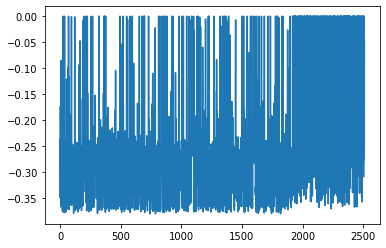

In [191]:
result = np.loadtxt(ROOT + 'submissions/submission_145.csv', delimiter= ' ')
df_res = pd.DataFrame()
df_res["index"] = np.argsort(-result)
df_res["score"] = -np.sort(-result)

print(describe(result))
print("Percentiles:")
print(np.percentile(result, range(5,100,5)))
plt.plot(result)
plt.show()

In [0]:
df_125 = df_res["index"].iloc[:135]
list_125 = df_125.to_list()
list_125

[2480,
 2124,
 2391,
 1945,
 1941,
 2325,
 1938,
 2321,
 2320,
 2313,
 2128,
 2160,
 2470,
 2297,
 2411,
 732,
 2292,
 2419,
 2266,
 2227,
 2096,
 2149,
 2433,
 2217,
 2154,
 2201,
 2197,
 2196,
 2444,
 2175,
 1795,
 2464,
 2387,
 2156,
 2383,
 2379,
 1998,
 2107,
 1953,
 2109,
 2353,
 2507,
 2019,
 2042,
 2372,
 2362,
 2040,
 2369,
 2368,
 2356,
 1996,
 2002,
 1995,
 2506,
 1971,
 1990,
 2337,
 1960,
 1575,
 1790,
 459,
 2409,
 927,
 143,
 697,
 1140,
 1664,
 1247,
 1431,
 1133,
 1803,
 1868,
 1787,
 619,
 375,
 708,
 1462,
 838,
 66,
 637,
 2392,
 767,
 260,
 1615,
 103,
 86,
 2311,
 2293,
 194,
 1632,
 526,
 2294,
 2106,
 2172,
 1470,
 745,
 651,
 1342,
 237,
 769,
 245,
 1185,
 1289,
 191,
 702,
 564,
 485,
 416,
 456,
 339,
 415,
 1311,
 740,
 1972,
 1416,
 1306,
 1547,
 832,
 1774,
 918,
 1001,
 586,
 548,
 1565,
 341,
 102,
 0,
 982,
 748,
 1822,
 1115,
 897,
 1159,
 1399,
 851]

In [0]:
list_to_change = [517,1565,832,1289,1001,194,524,637,897,1470,245,196,548,745,740,1133,1247,927,1615,838,260,237,1431,1664,1868,143,619,191,1575,1547,1140,1822,1790,767]

In [0]:
sscore[list_125] = 1

In [0]:
sscore[2124]

1.0

In [0]:
df_res.head()

index      score
0   1607  33.826258
1    596  16.753268
2   1005  16.154798
3    549  14.581993
4    520  13.504306

In [0]:
result[2378]

2.839574

In [0]:
df_res.head(10)

In [0]:
df_res.tail(10)

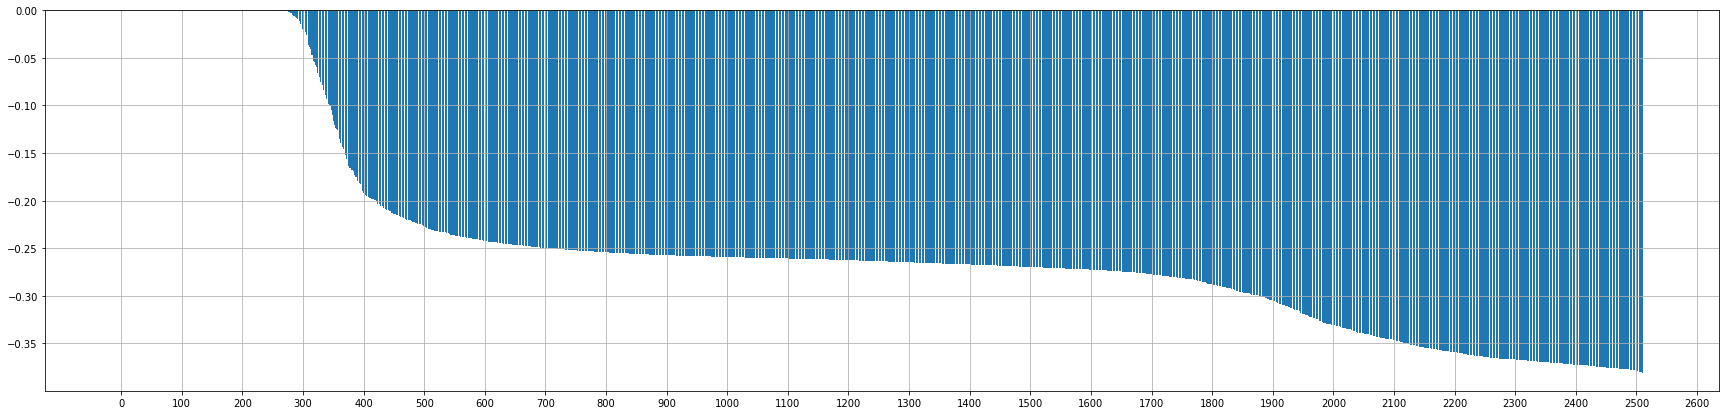

In [192]:
plt.figure(figsize=(30,7))
plt.bar(range(df_res.shape[0]), df_res["score"])
plt.xticks(range(0,2700,100))
plt.grid()
plt.show()

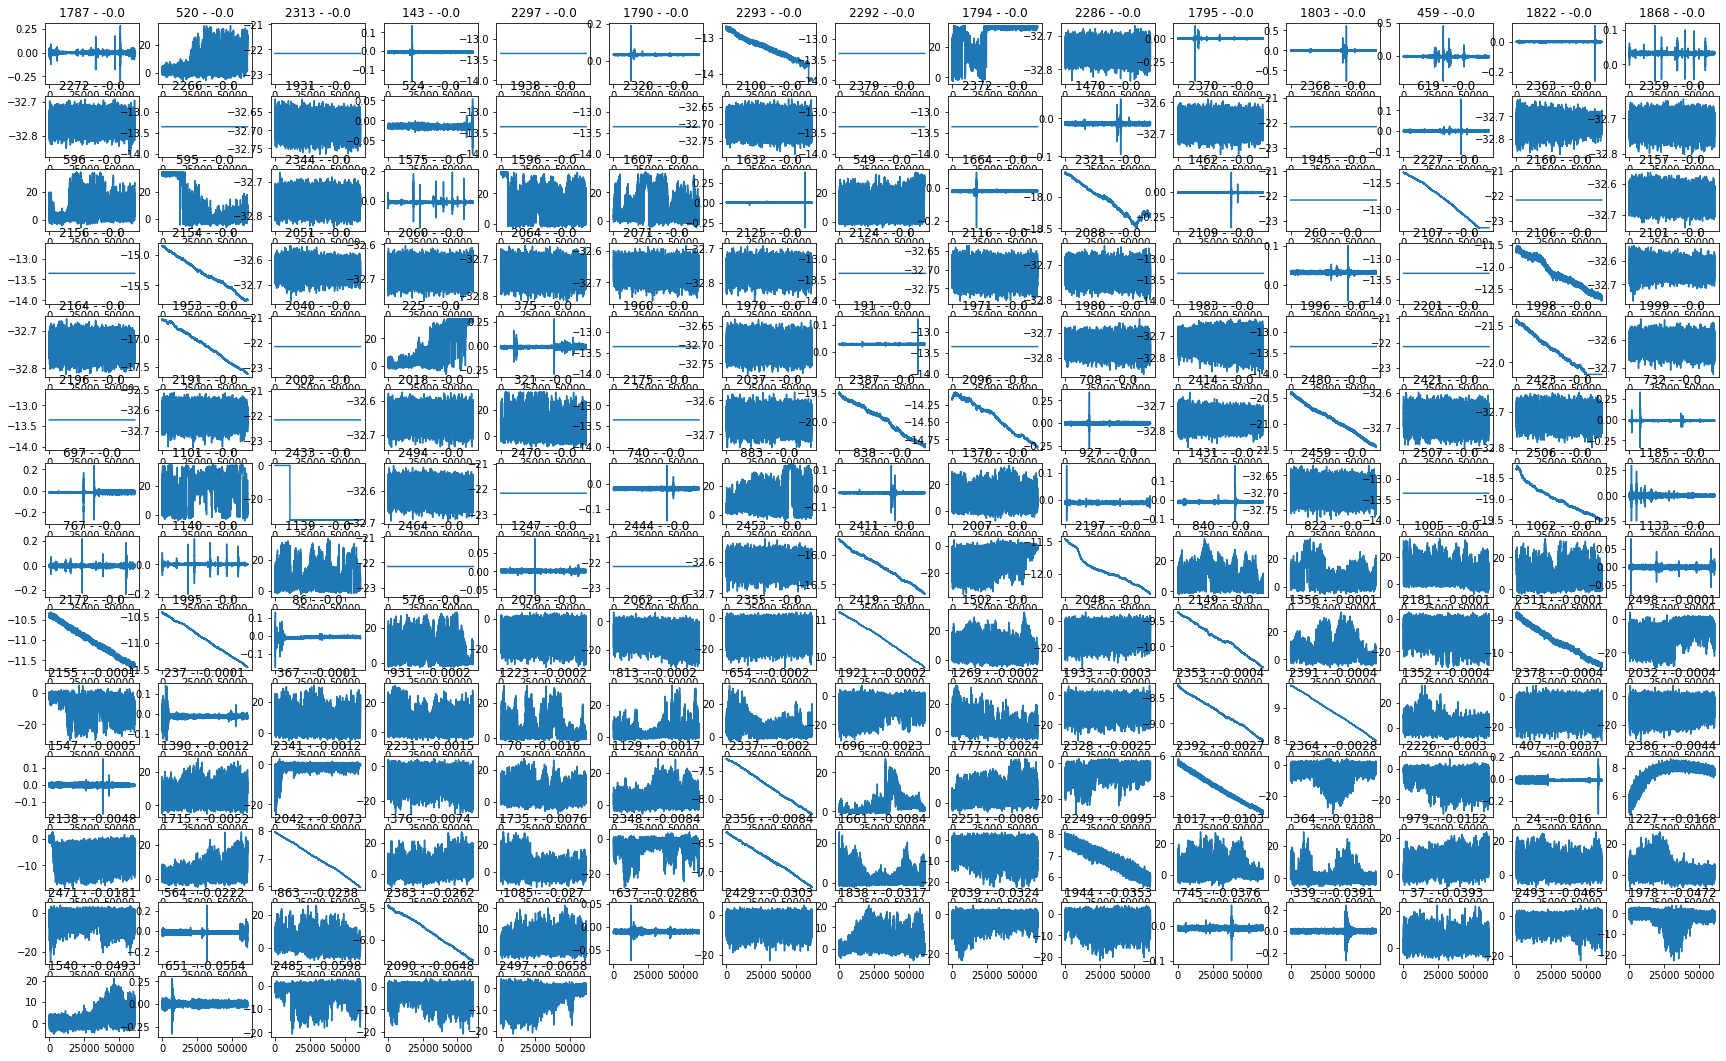

In [0]:
plt.figure(figsize=(30,20)) # x, y
for i in range(0,200): #225
  index = df_res["index"].iloc[i]
  plt.subplot(15,15,i+1)
  ax = plt.plot(xtest[index]) #xtest_rolling[index,1000:-1000])
  plt.title(str(index) + " - " + str(round(df_res["score"].iloc[i],4)))
plt.show()

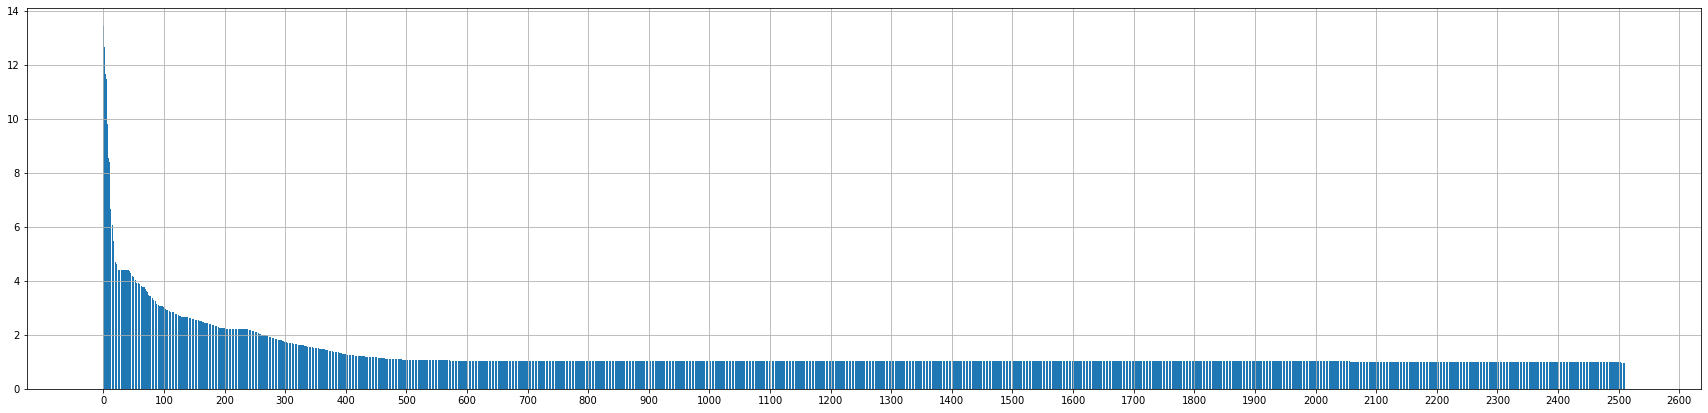

In [0]:
# Submission 5
plt.figure(figsize=(30,7))
plt.bar(range(df_res.shape[0]), df_res["score"])
plt.xticks(range(0,2700,100))
plt.grid()
plt.show()

## 5.2. Compare past submissions

In [0]:
nb_submissions = 145
df_submissions = pd.DataFrame()
for i in range(1, nb_submissions+1):
  df_submissions[str(i)] = np.loadtxt(ROOT + 'submissions/submission_' + str(i) + '.csv', delimiter= ' ')
df_submissions = df_submissions.rank(axis = 0, method='max', ascending=False)
#df_submissions["mean"] = np.mean(df_submissions, axis=1)
print(df_submissions.shape)
df_submissions.head()

(2511, 145)


1       2       3       4  ...     142     143     144     145
0   289.0   286.0  1935.0   223.0  ...  1540.0   404.0   420.0   388.0
1  2142.0  2087.0   565.0  1890.0  ...  1381.0   847.0  1099.0   847.0
2   936.0  2321.0  1882.0  1019.0  ...  2499.0  2124.0  2103.0  2120.0
3   663.0   658.0    51.0   544.0  ...   943.0   539.0   576.0   550.0
4  1827.0  1713.0   239.0  1765.0  ...  1024.0  1113.0  1170.0  1097.0

[5 rows x 145 columns]

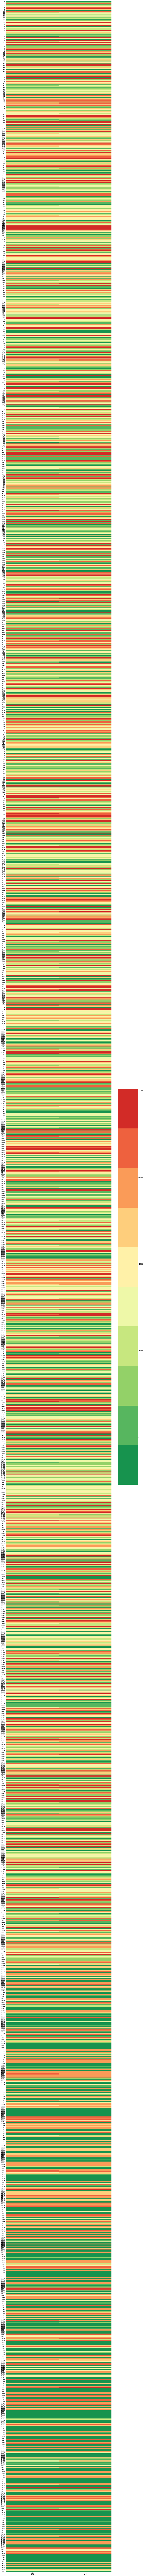

In [0]:
plt.figure(figsize=(15,300)) #15,300
sns.heatmap(df_submissions, cmap=sns.color_palette("RdYlGn_r", 10))
plt.show()

(78, 2511)


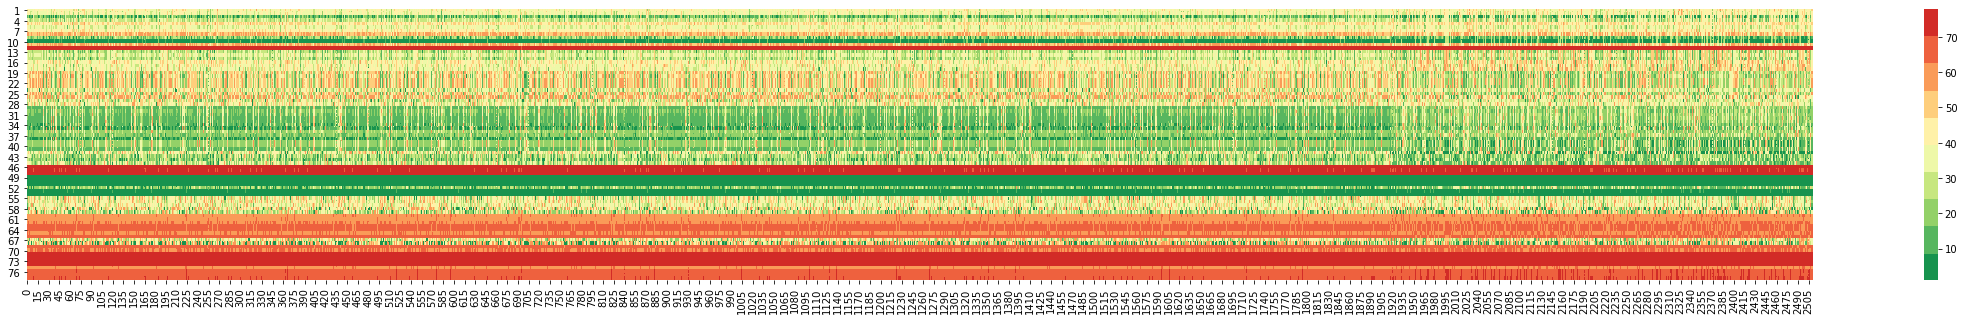

In [0]:
# Same but horizontal display
nb_submissions = 78
df_submissions = pd.DataFrame()
for i in range(1, nb_submissions+1):
  df_submissions[str(i)] = np.loadtxt(ROOT + 'submissions/submission_' + str(i) + '.csv', delimiter= ' ')
df_submissions = df_submissions.T
df_submissions = df_submissions.rank(axis = 0, method='max', ascending=False)
print(df_submissions.shape)

plt.figure(figsize=(40,5))
sns.heatmap(df_submissions, cmap=sns.color_palette("RdYlGn_r", 10)) #, xticklabels=corr_train.columns, yticklabels=corr_train.columns)
#sns.heatmap(df_submissions.iloc[:,300:400], cmap=sns.color_palette("RdYlGn_r", 10)) #, xticklabels=corr_train.columns, yticklabels=corr_train.columns)
plt.show()

In [0]:
sscore_sliced[:2511] + sscore_sliced[2511:2511*2] + sscore_sliced[2511*2:]

(44, 2511)

In [0]:
df_submissions = pd.DataFrame()
df_submissions["1"] = sscore_sliced[:2511]
df_submissions["2"] = sscore_sliced[2511:2511*2]
df_submissions["3"] = sscore_sliced[2511*2:]
df_submissions = df_submissions.rank(axis = 0, method='max', ascending=False)
#df_submissions["mean"] = np.mean(df_submissions, axis=1)
print(df_submissions.shape)
df_submissions.head()

(2511, 3)


1       2       3
0   584.0  1801.0  1286.0
1  1131.0  1179.0  1633.0
2   395.0   407.0   423.0
3  1218.0  1248.0  1634.0
4  1503.0  1378.0  1442.0

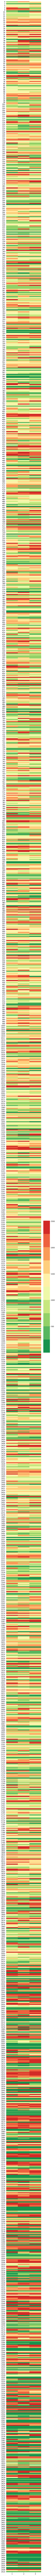

In [0]:
plt.figure(figsize=(5,300))
sns.heatmap(df_submissions, cmap=sns.color_palette("RdYlGn_r", 10))
plt.show()

## 5.3. Evaluate current score

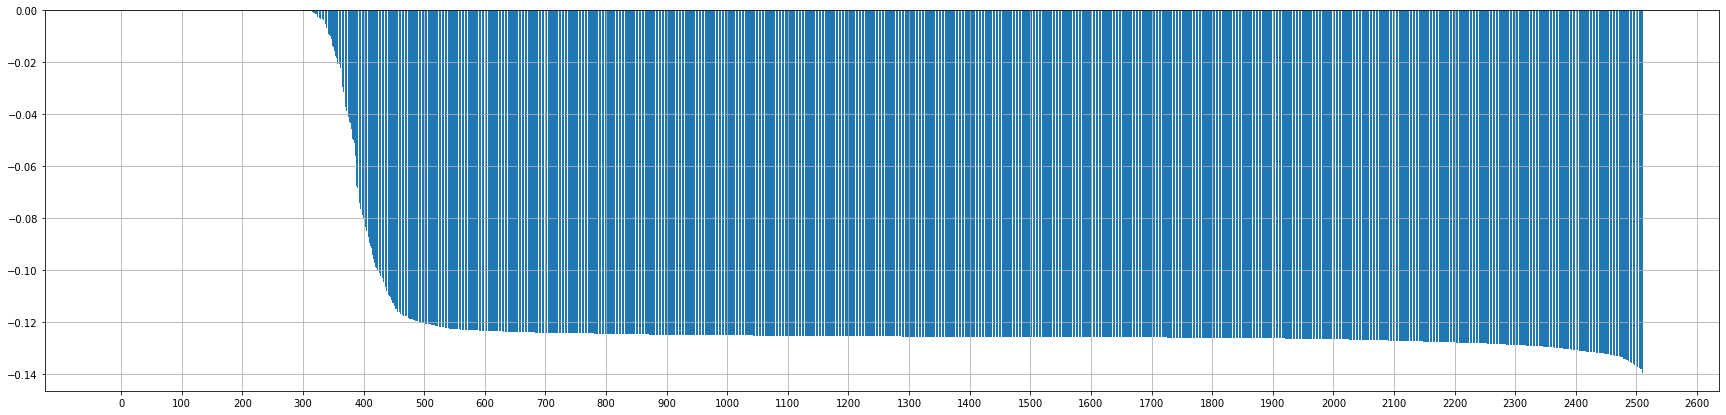

In [196]:
df_res = pd.DataFrame()
# minus signs are for sorting
df_res["index"] = np.argsort(-sscore)
df_res["score"] = -np.sort(-sscore)

plt.figure(figsize=(30,7))
plt.bar(range(df_res.shape[0]), df_res["score"])
plt.xticks(range(0,2700,100))
plt.grid()
plt.show()

In [0]:
sscore[225]

15.63329740147238

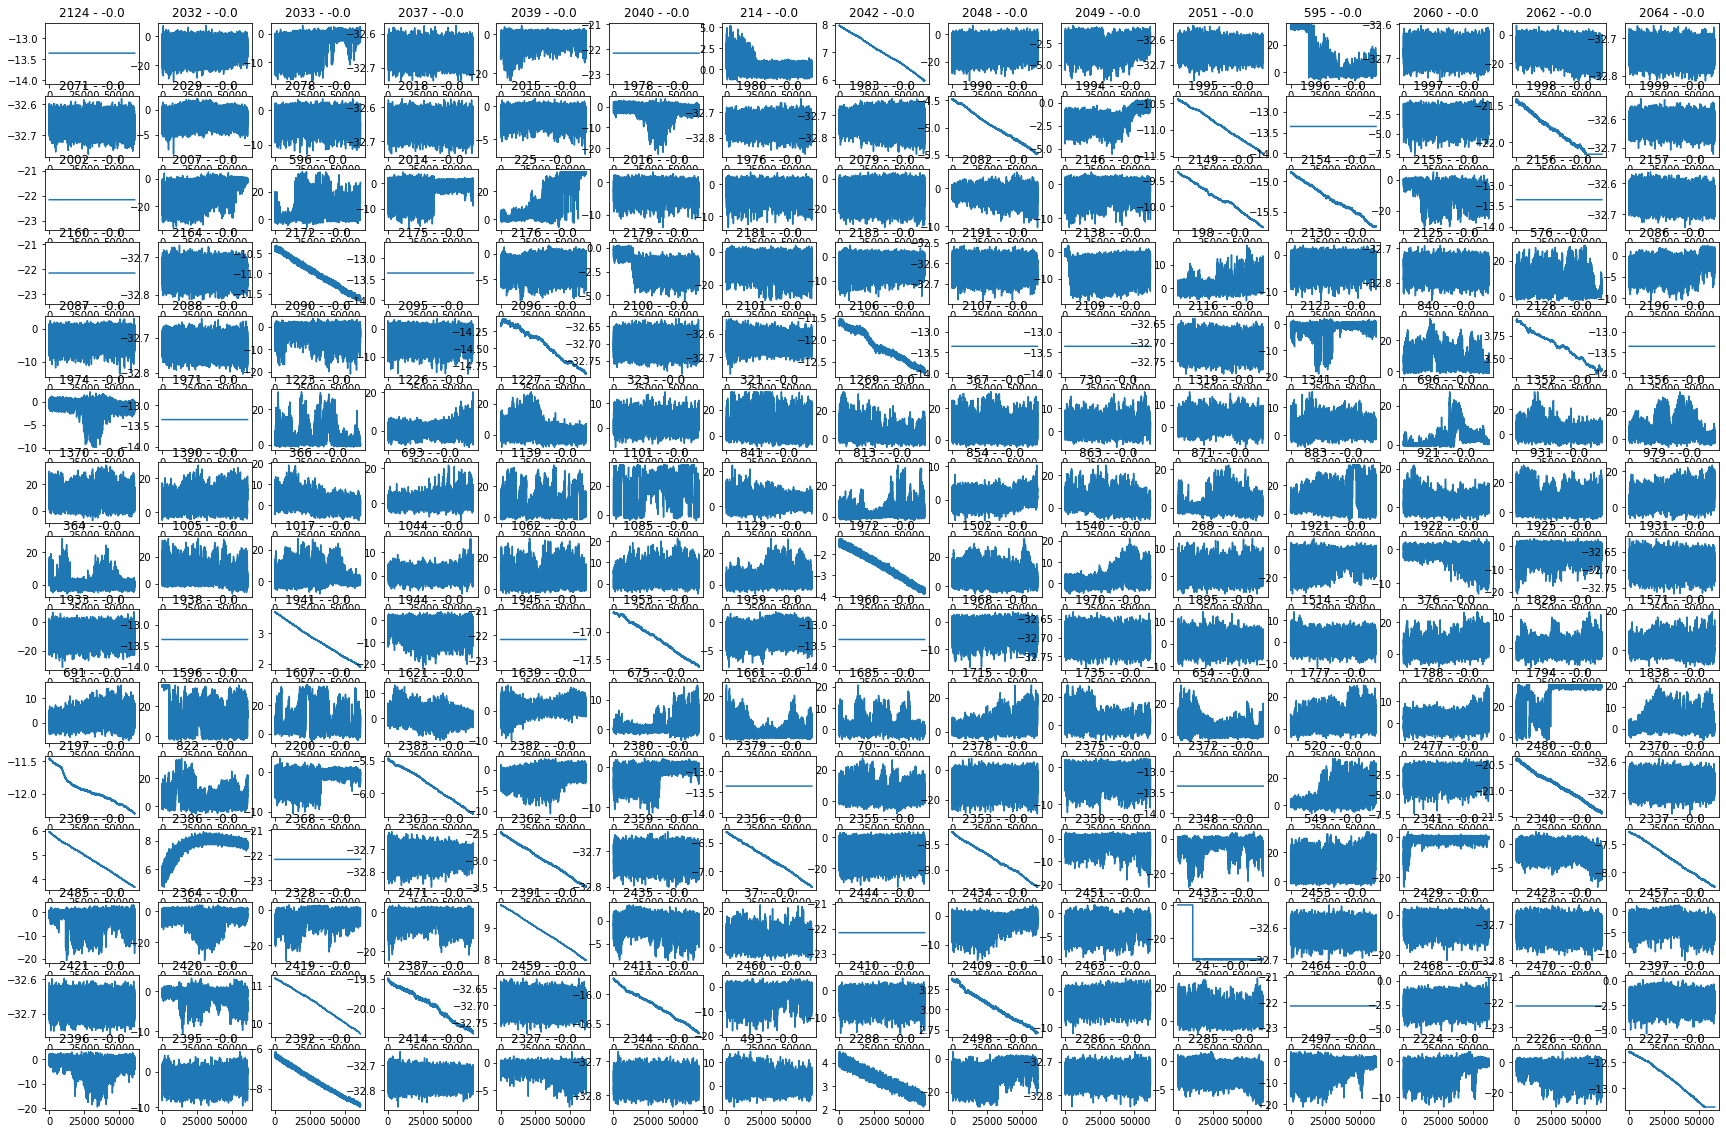

In [197]:
plt.figure(figsize=(30,20)) # x, y
for i in range(0,225):
  index = df_res["index"].iloc[i]
  plt.subplot(15,15,i+1)
  ax = plt.plot(xtest[index]) #xtest_rolling[index,1000:-1000])
  plt.title(str(index) + " - " + str(round(df_res["score"].iloc[i],4)))
plt.show()

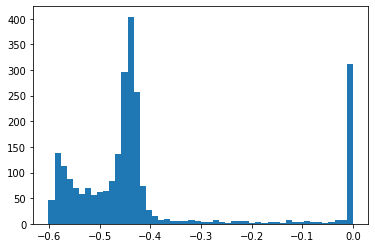

In [0]:
plt.hist(sscore, bins="auto")
plt.show()

# 6. Submission

In [198]:
# Save the anomaly scores to file
print(sscore.shape)
np.savetxt(ROOT + 'submissions/submission_147.csv', sscore, fmt = '%1.6f', delimiter=',')

(2511,)


In [0]:
print("Stats: ", xtrain_feat.columns)

Stats:  Index(['min', 'max', 'mean', 'rms', 'mean_crossings', 'hurst', 'p30', 'p70'], dtype='object')


### Submissions 0-100

* 1: fichier de base (score: 0.706630761244)
* 2: idem mais PCA sur tout le jeu de données (score: 0.714321690336)
* 3: idem mais PCA sur tout le jeu de données aussi pour calculer xtrain_fpca (score: 0.52)
* 4: retour v1 mais avec n_components = 8 pour la pca
* **5**: retour v1 mais avec n_components = 10 (je pensais avoir soumis pareil que le 2) (0.746458897252)
        -> Le seed influe beaucoup sur la PCA
* 6: idem, seed à 261 (0.70)
* 7: idem, seed à 8 (0.7072)
* 8: idem, seed remis à RANDOM_STATE (261) et n_neighbors = 20 pour LFO (0.721539854401)
* 9: xtest au lieu de xtrain, n_components = 5 et n_neighbors = 20 (0.710120879528)
* 10: idem mais n_components = 10 (0.710219758488)
* 11: xconcat (xtrain + xtest) pour le train, n_components = 10 et n_neighbors = 20 (0.721539854401). Même score avec xconcat que xtrain (normal car on prenait que les 100 premières rows pour fit le Lof)
* 12: OneClassSVM toute simple, gamma= auto (0.693180132745)
* 13: Lof trained with xtest and score obtained with *negative_outlier_factor_* (0.608454769056)
* 14: idem, but with PCA (5 components) trained on xtest (0.637194556713)
* 15: idem but PCA 10 components (0.608454769056)
* 16: idem but PCA 3 components (0.63060365605)
        -> 5 components is better than 10 and 3 on PCA
* 17: PCA with xconcat (n_components = 5), LFO with xtest (0.58350946148)
* 18: PCA with xconcat (n=5) and LFO on xconcat (extraction of the last scores, corresponding to xtest part) (0.593244404069)
* **19**: **soumission de base**: PCA (n=11) fittée sur tout xtrain, puis appliquée sur xtrain et xtest puis LFO (n=5) (0.592950857157)
* 20: idem sauf que LFO (n=10) (0.603503096147)
* 21: idem que 19, mais avec un score très bas mis pour les 30 premiers résultats (courbes homogènes mais valeurs vers -38) (0.561155091648)
* 22: erreur (même soumission que 21)
* 23: même principe que 21 mais en enlevant cette fois les courbes toutes plates, à 0 (0.552676220846)
* **24**: **dataframe created from features** (min, max, mean, etc.) (0.714724931094)
* 25: idem que 19
* 26: idem que 19 mais PCA et modèle fit sur xtrain[100:] (0.611723954664)
        -> Meilleur score obtenu, peut-être que s'entraîner sur qu'une partie des observations améliore le modèle
* **27**: comme la soumission de base (sauf PCA = 10), mais avec les colonnes ajoutées des features (donc 10+13 colonnes) (0.722596623284)
* **28**: idem que 24 mais sans les percentiles. D'ailleurs LFO n=5 (0.733363615015)
* **29**: idem que 28 mais LOF entraîné sur xtrain[1,131] (0.774044582051)
      -> Le dataframe des features donne des meilleurs résultats que le dataframe de base réduit avec une PCA
* 30: idem mais ajout de start (moyenne des 100 premières valeurs), end (moyenne des 100 dernières valeurs), progression (end - start) (0.771676121967)
* 31: idem mais sans start et end (0.771189452087)
* 32: idem but without progression, and var added (0.76720339402)
* 33: idem but keep var and remove std (0.767444411485)
* **34**: idem but keep only min, max, mean (0.775822858344)
* 35: idem, only max and mean (0.751178822599)
* 36: idem, only min, max, mean, xtrain[:100], to compare with sub 34 (0.76263024213)
* 37: idem, but xtrain[1:289] and LOF (n=100) (0.707186955393)
* 38: idem, but LOF (n=5) (0.761964354135)
      -> xtrain[1,131] (0.77) est mieux que xtrain[:100] (0.762) et xtrain[1:289] (0.761)
* 39: idem que 34, et concatenation avec une PCA (n =10) sur tout le jeu de données. Donc 13 colonnes au total (0.769823686455)
* 40: error
* 41: idem que 34, median added (0.77493912764)
* 42: moyenne mobile de 200, on retire les 300 premières valeurs à gauche et à droite puis on fait le set de features (min, max, mean) puis LFO (0.730012545268)
* 43: idem pour la moyenne mobile, mais on retire les 400 premières et dernières valeurs, puis on fait une PCA (n = 7) puis LFO (0.741069993944)
* 44: idem mais moyenne mobile sur 1000 (ça trace des courbes bien distinctes), on retire les 1000 premières et dernières puis PCA (n = 10) puis LFO (0.740401015981)
* **45**: idem que 44 mais PCA (n = 4) (0.752918474298)
-----
* 46: xtrain_feat (idem que 34), tout xtrain utilisé, OneClassSVM params par défaut (0.688407677951)
* 47: idem mais xtrain[1:131] (0.698414537679)
* 48: idem que 46, mais OneClassSVM est entraîné sur xtrain_feat et xtest_feat concaténés (0.682379151371)
* **49**: **Stacking** (sommes) des scores des submissions 34 (features avec min, max, mean) et 45 (rolling 1000, PCA (n=4)) avec à chaque fois xtrain[1:131]  LOF (n=5)  recalculées **(0.781531573288)**
* 50: idem mais ajout de la solution de base, presque 19 (PCA (n=10) sur les données normales puis LFO avec xtrain[1:131]) dans le stacking (0.753622986886) -> la solution de base n'est pas très bonne, ne plus l'utiliser
* 51: idem que 49 mais ajout de la soumission 46 (xtrain_feat puis OneClassSVM sur tout xtrain_feat) (0.752740801167)
      -> Le stacking améliore le résultat (avec des modèles bien choisis)
* 52: slicing de chaque échantillon en 3, conversion en features, LFO, déslicing en prenant le score max des 3 sections pour chaque échantillon (0.716598996379)
* 53: idem mais sum au lieu de max (0.727539026289)
      -> le slicing testé est pas top
* 54: idem que 49 mais le stacking est fait en prenant le max des deux résultats et non la somme (0.777611949522)
* 55: **xtrain without outliers**. Modèle features classique (comme sub 34), mais LOF entraîné sur xtrain sans ses outliers (on a enlevé les 200 valeurs les moins normales de xtrain grâce à un LOF dédié) (0.743481713572)
* 56: pour vérification, même soumission que la 34, mais LOF sur tout xtrain (0.741090078732)
* 57: idem que 55 mais en en enlevant 1000 au lieu de 200 (0.716169490897)
* 58: scaler les données (par une formule), puis features (comme sub 34), puis LFO sur tout (0.685665331801) -> Mauvais score pcq maintenant la moyenne est à quasi 0 pour tout le monde ?
* 59: idem mais pca (N=6) au lieur de features (0.475198375913) lol
-------
* 60: Isolation forest (paramètres de base), sur xtrain_feat (min, max, mean), entraîné sur tout xtrain_feat (0.741623098125)
* 61: idem mais xtrain_feat[1:131] (0.704803045472)
* 62: idem que 60, mais avec ces feats: ["min", "max", "mean", "std", "etendue", "median", "q1", "q2", "q3"] (0.744898463668)
* 63: idem mais n_estimators=1000 (0.727134240548)
* 64: idem mais warm_start=True (0.727134240548)
* 65: idem que 60 mais feat: "min", "max", "mean", "std", "etendue", "median" (0.7189829063)
* 66: Isolation forest (paramètres de base), sur xtrain_pca (n=9), entraîné sur tout xtrain_pca (0.662427231266)
--------
* 67 KernelPCA (n_components=9, kernel='rbf'), puis LFO sur tout xtrain (0.626883335187)
* 68: idem KernelPCA mais n_components laissé par défaut (il a sorti 1776 colonnes) (0.35931841497). Il a sorti en plus grandes anomalies des courbes tout à fait normales
* 69: idem mais Isolation forest plutôt que OLF. Les courbes sorties en anomalies sont composées de motifs rares (top !) mais mélangés à des motifs communs) (0.318424240177)
* 70: idem que 62 + ajout de la colonne surface (0.733596907561)
-------
* 71: OneClassSVM avec xfeat ("min", "max", "mean", "std", "etendue", "median", "q1", "q2", "q3" + SURFACE) (0.679109965763). Les 85 premières valeurs avaient le même score d'anomalie (0 pile)
* 72: OneClassSVM avec xfeat ("min", "max", "mean", "var",  "median"), train sur tout xfeat (0.688528186683)
* 73: OneClassSVM avec xfeat (min, max, mean) - même submission que 46 (0.688407677951)
* 74: j'ai resoumis 46, j'ai obtenu un score différent (0.688407677951). J'avais fait une erreur à la 46
* 75: j'ai resoumis 60, j'ai obtenu le même score
* **76**: OneClassSVM avec xfeat (tol=0.001, nu=0.005, gamma='scale') **(0.802028872656)**
* 77: OneClassSVM avec xfeat (tol=0.001, nu=0.0005, gamma='scale') (0.801778585289)
* **78**: idem que 76 avec xfeat + colonne surface (0.801489673329)
--------
* 79: Fusion d'algos (5, 34, 45, 76 # PCA + LFO, features + LFO, moyenne mobile + PCA, feat + OneClassSVM), rank puis mean (0.801278010555)
* 80: idem, mais que avec les algos 5 et 76 (0.796990680658)
* 81: idem que 79, mais que les algos 34, 45, 76 (0.804374157984)
* **82: Fusion d'algos** (34, 45, 76), MinMaxScaling des scores puis mean **(0.809047733818)**
* 83: idem, mais max au lieu de mean (0.802109211811)
* 84: OneClassSVM avec xfeat ("min", "max", "mean", "var", "median"), tout xfeat (tol=0.001, nu=0.003, gamma='scale') (0.802031962624)
* **85**: idem que 84, mais concatenation de xfeat avec xpca (au prealable rolling de 1000, PCA n=4) **(0.828806530955)**
* 86: idem mais OneClass avec tol=1 (0.65244200131)
* 87: idem que 85, mais gamma = 0.3 (0.763555687394)
* 88: fursion d'algos (idem 82) mais algos 34, 45 et 85 (0.82645815566)
---------
* 89: Autoencoder (hidden_neurons =[6000, 100, 2, 100, 6000]) sur xtrain [:500,:6000] (0.563356693488)
* 90: Autoencoder [614, 100, 2, 100, 614] sur xtrain (2511, 614) - 614 obtenu par réduction de données par moyennage (0.657008973266)
* 91: Autoencoder [614, 200, 100, 10, 100, 200, 614] (et validation size=0.3) sur xtrain (1677, 614) (0.65733650982)
* 92: Autoencoder [6144, 200, 100, 10, 100, 200, 6144] sur xtrain (1677, 6144) (0.558814441272)
* 93: SO_GAAL (paramètres par défaut) sur xtrain (1677, 6144) (0.666723831065)
---------
* 94: OneClassSVM (tol=0.001, nu=0.005, gamma='scale') sur xtrain ("min", "max", "mean", "var", "median", "p5", "p95") (0.804018811722)
* 95: erreur (idem 94)
* 96: idem 94, mais p30 et p70 au lieu de p5 et p95 (0.805103390312)
* 97: idem mais sans la médiane (0.803305029231)
* 98: idem mais sans la moyenne non plus (0.801387704401)
* **99**: idem mais on remet la moyenne et on enlève la var **(0.810571087792)**
---------


### Submissions 100-200

* 100: OSVM, avec les X transformé par maxabs_scale (certaines courbes comme la xtest 2125 sont chelous) puis xfeat (min, max, median, 30, 70) (0.73664825046)
* 101: xtrain_rebin (614 points) puis envoyé comme ça à OSVM (0.668398593447)
* 102: erreur (idem que 101)
* 103: xtrain_rebin (614 points) puis xfeat (min, max, mean, 30, 70) (0.668398593447) (0.779278986985)
* 104: rebin puis PCA (4) puis OSVM (0.714032778375)
-> Le rebin donne des scores moins bons
----
* 105: xfeat ('min', 'max', 'mean', 'median', 'var', 'std', 'etendue', 'skewness', 'kurtosis', 'p10', 'p30', 'p70', 'p90') puis OSVM (tol=0.001, nu=0.005, gamma='scale') (0.76434980904) -> Fait ressortir des courbes toutes plates avec 1 ou 2 pics au milieu. **Bien pour du stacking**
* 106: idem, mais isolation forest(n_estimators=500, max_features=10) au lieu de OSVM (0.723250151408)
* 107: idem mais isolation forest (n_estimators=500, max_samples= 500, max_features=10) (0.729026845638)
* 108: idem mais isolation forest (n_estimators=1000, max_samples=1000, max_features=10) (0.738060365605)
* 109: idem mais isolation forest (n_estimators=3000, max_samples=3000, max_features=13) (0.74023570272)
* 110: idem mais sur xfeat**2 (0.656843660005)
* 111: idem mais sur xfeat**3 (0.642946531202)
* 112: idem que 105 mais OSVM (tol=0.001, nu=0.005, gamma='auto') (0.721694352775)
* 113: idem 105 mais xfeat puis xpca (3) (0.564252784061)
* 114: idem 105 mais xfeat ('min', 'max', 'etendue', 'skewness', 'kurtosis', 'p30', 'p70') (0.746316758748)
* 115: idem 105 mais xfeat ('min', 'max', 'mean', 'skewness', 'p30', 'p70') (0.792096172148)
------
* 116: xtrain_rebin puis xtrain_fft puis xtrain_peaks puis OSVM (0.538042134797)
* 117: idem mais ajout d'une pca (2) avec OSVM (0.657858714326) - détecte que 300 anomalies mais dont certaines courbes rares (cassures, etc.) - **peut être intéressant avec l'ajout de colonnes feat**
* 118: idem mais PCA (8) (0.71185744126) - **idem**
* 119: idem + concatenation de xfeat (min, max, mean p30, p70) (0.788131743854)
* 120: idem 118 mais on prend que les 312 premières colonnes de xtrain_peaks avant la PCA (car les colonnes sont symétriques) (0.713037808842)
* 121: idem mais PCA (5) (0.704321010543)
-------
* 122: xfeat ('min', 'max', 'mean', 'rms', 'mean_crossings', 'p30', 'p70') puis OSVM (0.558148553277) - **Très peu d'anomalies repérées, mais anomalies très intéressantes (courbes inclinées, courbes cassées)**
* 123: xfeat ('min', 'max', 'mean', 'rms', 'p30', 'p70') puis OSVM **(0.810592717565)**
* 124: xfeat ('min', 'max', 'rms', 'p30', 'p70') osvm (0.807583089226)
* 125: xfeat (juste mean_crossings haha) OSVM (0.625027809707) - **même conclusion que 122. Peut-être préférer 125 à 122**
* 126: idem mais IsolationForest(n_estimators=3000, max_samples=1677, max_features=1 (0.579120162656)
* 127: idem mais LocalOutlierFactor(n_neighbors = 5, contamination = 'auto', novelty = True) (0.563398408049)
* 128: même idée que 85 (avec juste ajout de rms normalement), OneClassSVM (tol=0.001, nu=0.005, gamma='scale') avec xfeat ('min', 'max', 'mean', 'rms', 'p30', 'p70'), tout xfeat  et concatenation de xfeat avec xpca (au prealable rolling de 1000, PCA n=4) (0.82655703462)
-------
* 129: soumission 128 + on prend les anomalies avec les 120 plus haut scores de la soumission 125 et on les met automatiquement à 0 (qui correspond au meilleur score de la soumission 128) (0.820397184422)
* 130: idem, mais on prend que les anomalies 58:120, pour éviter les toutes plates et les plates inclinées (0.820397184422)
* 131: idem mais au lieu de mettre à 0, je met à -1 (donc pas anomalies) les anomalies [:58] (les plates et plates inclinées) (0.749208968322) -> les plates et plates inclinées sont bien des anomalies
* 132: idem 131 mais au lieu de mettre à 0, on les met à 1 (donc les plus anormales) (0.82655703462) - Même score que 128 - normal car les 58 mis à 1 avaient déjà un score de 0 (sauf un)
* 133: idem mais les 150 premiers sont mis à 1 (0.809736796569)
* 134: idem mais que les 120 premiers (0.819131842733)
* 135: idem mais en prenant 85 et en mettant à 1 des courbes plates à des pics très fin très haut (0.821025992807)
-------
* 136: xfeat ('min', 'max', 'mean', 'rms', 'hurst', 'p30', 'p70') OSVM (0.810200291693)
* 137: xfeat ('hurst') (0.561963118148) - même conclusion que 125
* 138: soumission 85 + on prend les anomalies avec les 135 plus hauts scores de la soumission 137, que l'on met à 1 (0.808573423808)
* **139**: xfeat ('min', 'max', 'mean', 'rms', 'mean_crossings', 'hurst', 'p30', 'p70') avec mean_crossings normalisé avec StandardScaler et OSVM (tol=0.001, nu=0.005, gamma='scale') **(0.857998998851)**
* 140: idem mais OSVM (tol=0.001, nu=0.003, gamma='scale') **(0.85817203703)**
* 141: idem mais OSVM (tol=0.001, nu=0.001, gamma='scale') (0.857793516012)
* 142: idem mais OSVM (tol=0.0001, nu=0.003, gamma='scale') (0.857998998851)
* 143: idem 140 + ajout colonnes xrolling[1000] puis PCA (4) **(0.886296921156)**
* 144: stacking 105 + 143 (scaling puis mean) (0.858260101104)
* 145: idem 143 mais xrolling[300] **(0.886647632467)**
* 146: idem que 145, sauf que OSVM sur feat et OSVM séparée sur pca, puis stacking  (scalé puis mean) (0.880989901986) 
          -> Il vaut mieux calculer les scores avec les colonnes concaténées que à part 
* 147: juste rolling, on enlève les 300 extremités puis PCA (0.733490303682) -> donc rolling est plus efficace que rebin


# 7. Conclusions

In [0]:
### 7.1. PCA

### 7.1. PCA


With this eigen value repartition, we have a better score by keeping 5 components (score: 0.637) than 10 (0.608) and 3 (0.631).

![PCA-eigenvalues](./images/PCA_components.png)

The PCA is not really adapted to time series, because PCA uses linear algebra to transform data.

In contrast, the **autoencoder techniques** can perform non-linear transformations with their non-linear activation function and multiple layers

## 7.2. Results comparison

We will explore the submission we made. We take the one with the best score, submission 5 (0.746), and the one with the worst score, submission 3 (0.52).

The score repartition is better with the submission 5. We have a clear separation between the top scores and the others. The curve of the submission 3 is too smooth.

![Score repartition submission 5](./images/score-repartition-submission-5.png) 

![Score repartition submission 3](./images/score-repartition-submission-3.png) 

The time series with the highest scores seem more atypical for the submission 5 than submission 3. For instance, in the submission 3 there is no inclined curves compared to submission 5. It gives a good idea as the curves that must be classified as anomalies.

![Time series with the highest scores for submission 5](./images/submission-5.png) 

![Time series with the highest scores for submission 3](./images/submission-3.png) 